In [504]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [505]:
df=pd.read_csv('C:sleep_merged.tsv',delimiter='\t')

<h1 align="center"><b><i>EXPLORATORY DATA ANALYSIS</i></b></h1>


In [506]:
# Display the first few rows of the DataFrame 'df'
df.head()  

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
1,African giant pouched rat,Cricetomys,Rodentia,omni,NaN,1.000,6.6,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.0,8.7,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,NaN,25.0,5.0,2.0,3.0


In [507]:
# Generates summary statistics for numerical columns in DataFrame 'df'
df.describe()  


,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,54.000000,54.000000,58.000000,58.000000,58.000000
mean,161.384310,196.405287,10.608046,13.393103,8.736170,1.979365,20.240741,139.268519,2.844828,2.362069,2.586207
std,768.846727,793.628150,4.465793,4.467481,3.679522,1.474204,18.757011,144.696322,1.496214,1.575005,1.426989
min,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,6.125000,36.750000,2.000000,1.000000,1.000000
50%,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,43.165000,64.000000,13.750000,15.850000,11.000000,2.500000,28.000000,195.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000


In [508]:
# Generates summary statistics for categorical columns in DataFrame 'df'
df.describe(include=object)

,Species,Genus,Order,Vore,Conservation
count,87,87,87,87,58
unique,87,80,19,4,7
top,African elephant,Spermophilus,Rodentia,herbi,lc
freq,1,3,22,37,30


In [509]:
df.isna().sum()  # Count missing values per column in DataFrame 'df'


Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan        33
Gestation       33
Predation       29
Exposure        29
Danger          29
dtype: int64

In [510]:
def get_mode(x):
    # Calculate the most frequent value(s) in the input series 'x'
    frequent_values = x.mode()  
    return frequent_values.iat[0] if not frequent_values.empty else None  # Return the first frequent value if exists, else None

# Calculate the most frequent 'Conservation' value grouped by 'Order' and 'Vore', and convert to dictionary
average_conservation = df.groupby(['Order', 'Vore'])['Conservation'].agg(get_mode).astype(object).to_dict()



In [511]:
average_conservation

{('Afrosoricida', 'omni'): None,
 ('Artiodactyla', 'herbi'): 'domesticated',
 ('Artiodactyla', 'omni'): 'domesticated',
 ('Carnivora', 'carni'): 'lc',
 ('Cetacea', 'carni'): 'cd',
 ('Chiroptera', 'insecti'): 'lc',
 ('Cingulata', 'carni'): 'lc',
 ('Cingulata', 'insecti'): 'en',
 ('Didelphimorphia', 'carni'): 'lc',
 ('Didelphimorphia', 'omni'): 'lc',
 ('Diprotodontia', 'herbi'): None,
 ('Erinaceomorpha', 'insecti'): 'lc',
 ('Erinaceomorpha', 'omni'): 'lc',
 ('Hyracoidea', 'herbi'): 'lc',
 ('Lagomorpha', 'herbi'): 'domesticated',
 ('Monotremata', 'insecti'): None,
 ('Perissodactyla', 'herbi'): 'domesticated',
 ('Pilosa', 'herbi'): None,
 ('Primates', 'carni'): None,
 ('Primates', 'herbi'): 'cr',
 ('Primates', 'omni'): 'lc',
 ('Proboscidea', 'herbi'): 'en',
 ('Rodentia', 'carni'): 'lc',
 ('Rodentia', 'herbi'): 'lc',
 ('Rodentia', 'insecti'): None,
 ('Rodentia', 'omni'): None,
 ('Scandentia', 'omni'): None,
 ('Soricomorpha', 'insecti'): 'lc',
 ('Soricomorpha', 'omni'): 'lc'}

In [512]:
df.groupby(["Order","Vore"]).Dreaming.mean() # Mean of 'Dreaming' column grouped by 'Order' and 'Vore'

Order            Vore   
Afrosoricida     omni       2.300000
Artiodactyla     herbi      0.525000
                 omni       1.900000
Carnivora        carni      1.928571
Cetacea          carni      0.100000
Chiroptera       insecti    2.950000
Cingulata        carni      3.100000
                 insecti    6.100000
Didelphimorphia  carni      6.600000
                 omni       5.600000
Diprotodontia    herbi      1.650000
Erinaceomorpha   insecti    2.700000
                 omni       4.100000
Hyracoidea       herbi      0.533333
Lagomorpha       herbi      0.900000
Monotremata      insecti         NaN
Perissodactyla   herbi      0.733333
Pilosa           herbi      2.200000
Primates         carni           NaN
                 herbi      0.900000
                 omni       1.233333
Proboscidea      herbi      1.800000
Rodentia         carni           NaN
                 herbi      2.100000
                 insecti    2.400000
                 omni       2.000000
Scandentia   

In [513]:
df.loc[df.Dreaming.isna(),["Order","Vore"]]

,Order,Vore
0,Proboscidea,herbi
2,Rodentia,omni
3,Carnivora,carni
4,Rodentia,herbi
8,Cetacea,carni
11,Carnivora,carni
14,Cetacea,carni
17,Rodentia,herbi
23,Rodentia,herbi
33,Primates,herbi


In [514]:
# calculates the mean of the 'Dreaming' column grouped by 'Order' and 'Vore' in the DataFrame df, converts the result to a dictionary format with floating-point values.
average_dreaming=df.groupby(["Order","Vore"]).Dreaming.mean().astype(float).to_dict()
average_dreaming

{('Afrosoricida', 'omni'): 2.3,
 ('Artiodactyla', 'herbi'): 0.5249999999999999,
 ('Artiodactyla', 'omni'): 1.9,
 ('Carnivora', 'carni'): 1.9285714285714286,
 ('Cetacea', 'carni'): 0.1,
 ('Chiroptera', 'insecti'): 2.95,
 ('Cingulata', 'carni'): 3.1,
 ('Cingulata', 'insecti'): 6.1,
 ('Didelphimorphia', 'carni'): 6.6,
 ('Didelphimorphia', 'omni'): 5.6,
 ('Diprotodontia', 'herbi'): 1.65,
 ('Erinaceomorpha', 'insecti'): 2.7,
 ('Erinaceomorpha', 'omni'): 4.1,
 ('Hyracoidea', 'herbi'): 0.5333333333333333,
 ('Lagomorpha', 'herbi'): 0.9,
 ('Monotremata', 'insecti'): nan,
 ('Perissodactyla', 'herbi'): 0.7333333333333334,
 ('Pilosa', 'herbi'): 2.2,
 ('Primates', 'carni'): nan,
 ('Primates', 'herbi'): 0.9,
 ('Primates', 'omni'): 1.2333333333333334,
 ('Proboscidea', 'herbi'): 1.8,
 ('Rodentia', 'carni'): nan,
 ('Rodentia', 'herbi'): 2.1,
 ('Rodentia', 'insecti'): 2.4,
 ('Rodentia', 'omni'): 2.0,
 ('Scandentia', 'omni'): 2.6,
 ('Soricomorpha', 'insecti'): 2.05,
 ('Soricomorpha', 'omni'): 1.966666666

In [515]:
# calculates the mean of the 'Lifespan' column grouped by 'Order' and 'Vore' in the DataFrame df, converts the result to a dictionary format with floating-point values.
average_Lifespan=df.groupby(["Order","Vore"]).LifeSpan.mean().astype(float).to_dict()
average_Lifespan

{('Afrosoricida', 'omni'): 4.5,
 ('Artiodactyla', 'herbi'): 23.0,
 ('Artiodactyla', 'omni'): 27.0,
 ('Carnivora', 'carni'): 22.3875,
 ('Cetacea', 'carni'): nan,
 ('Chiroptera', 'insecti'): 21.5,
 ('Cingulata', 'carni'): 6.5,
 ('Cingulata', 'insecti'): 7.0,
 ('Didelphimorphia', 'carni'): 3.0,
 ('Didelphimorphia', 'omni'): 5.0,
 ('Diprotodontia', 'herbi'): 13.0,
 ('Erinaceomorpha', 'insecti'): nan,
 ('Erinaceomorpha', 'omni'): 6.0,
 ('Hyracoidea', 'herbi'): 6.75,
 ('Lagomorpha', 'herbi'): 18.0,
 ('Monotremata', 'insecti'): 50.0,
 ('Perissodactyla', 'herbi'): 38.800000000000004,
 ('Pilosa', 'herbi'): nan,
 ('Primates', 'carni'): 12.7,
 ('Primates', 'herbi'): 39.3,
 ('Primates', 'omni'): 34.075,
 ('Proboscidea', 'herbi'): 53.8,
 ('Rodentia', 'carni'): nan,
 ('Rodentia', 'herbi'): 5.8999999999999995,
 ('Rodentia', 'insecti'): nan,
 ('Rodentia', 'omni'): 4.5,
 ('Scandentia', 'omni'): 2.3,
 ('Soricomorpha', 'insecti'): 2.75,
 ('Soricomorpha', 'omni'): 3.05}

In [516]:
average_dreaming.keys()

dict_keys([('Afrosoricida', 'omni'), ('Artiodactyla', 'herbi'), ('Artiodactyla', 'omni'), ('Carnivora', 'carni'), ('Cetacea', 'carni'), ('Chiroptera', 'insecti'), ('Cingulata', 'carni'), ('Cingulata', 'insecti'), ('Didelphimorphia', 'carni'), ('Didelphimorphia', 'omni'), ('Diprotodontia', 'herbi'), ('Erinaceomorpha', 'insecti'), ('Erinaceomorpha', 'omni'), ('Hyracoidea', 'herbi'), ('Lagomorpha', 'herbi'), ('Monotremata', 'insecti'), ('Perissodactyla', 'herbi'), ('Pilosa', 'herbi'), ('Primates', 'carni'), ('Primates', 'herbi'), ('Primates', 'omni'), ('Proboscidea', 'herbi'), ('Rodentia', 'carni'), ('Rodentia', 'herbi'), ('Rodentia', 'insecti'), ('Rodentia', 'omni'), ('Scandentia', 'omni'), ('Soricomorpha', 'insecti'), ('Soricomorpha', 'omni')])

In [517]:
average_dreaming[('Afrosoricida', 'omni')]

2.3

In [518]:
df_copy=df.copy()

In [519]:
df.isna().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan        33
Gestation       33
Predation       29
Exposure        29
Danger          29
dtype: int64

In [520]:
len(df[df['Conservation'].isna()])

29

In [521]:
column_to_fill = "Conservation"

# Create a dictionary with mode values for the current column
mode_column = df.groupby(["Order", "Vore"])[column_to_fill].agg(lambda x: x.mode().iat[0] if not x.mode().empty else None).to_dict()

# Define a function to fill missing values for the current column
def column_guesser(order_vore_tuple):
    return mode_column[tuple(order_vore_tuple)]

# Iterate over unique combinations of Order and Vore
for order, vore in mode_column.keys():
    # Filter the DataFrame based on the current combination of Order and Vore
    temp_df = df.loc[(df.Order == order) & (df.Vore == vore), :]

    # Get the indices of missing values for the current column
    missing_value_index = temp_df[temp_df[column_to_fill].isna()].index

    # Fill missing values for the current column
    df.loc[missing_value_index, column_to_fill] = column_guesser([order, vore])


In [522]:
# Iterate over each column
columns_to_fill = ["Dreaming", "LifeSpan", "Predation", "Gestation","Predation","Exposure"]

for column in columns_to_fill:
    # Create a dictionary with mean values for the current column
    average_column = df.groupby(["Order", "Vore"])[column].mean().astype(float).to_dict()

    # Define a function to fill missing values for the current column
    def column_guesser(order_vore_tuple):
        return average_column[tuple(order_vore_tuple)]

    # Iterate over unique combinations of Order and Vore
    for order, vore in average_column.keys():
        # Filter the DataFrame based on the current combination of Order and Vore
        temp_df = df.loc[(df.Order == order) & (df.Vore == vore), :]

        # Get the indices of missing values for the current column
        missing_value_index = temp_df[temp_df[column].isna()].index

        # Fill missing values for the current column
        df.loc[missing_value_index, column] = column_guesser([order, vore])

In [523]:
df.isna().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    10
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming         3
LifeSpan         7
Gestation        7
Predation        5
Exposure         5
Danger          29
dtype: int64

In [524]:
df[df['Conservation'].isna()]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
1,African giant pouched rat,Cricetomys,Rodentia,omni,None,1.000,6.6,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,None,0.044,0.0,8.7,15.3,NaN,2.0,4.5,42.0,3.0,1.0,NaN
49,Mole rat,Spalax,Rodentia,insecti,None,0.122,3.0,10.6,13.4,8.2,2.4,NaN,30.0,2.0,1.0,1.0
59,Phalanger,Phalanger,Diprotodontia,herbi,None,1.620,11.4,13.7,10.3,11.9,1.8,13.0,17.0,2.0,1.0,2.0
62,Potoroo,Potorous,Diprotodontia,herbi,None,1.100,0.0,11.1,12.9,NaN,1.5,13.0,17.0,2.0,1.0,NaN
71,Short-nosed echidna,Tachyglossus,Monotremata,insecti,None,4.500,25.0,8.6,15.4,8.6,NaN,50.0,28.0,2.0,2.0,2.0
72,Slow loris,Nyctibeus,Primates,carni,None,1.400,12.5,11.0,13.0,NaN,NaN,12.7,90.0,2.0,2.0,2.0
75,Tenrec,Tenrec,Afrosoricida,omni,None,0.900,2.6,15.6,8.4,11.0,2.3,4.5,60.0,2.0,1.0,2.0
78,Three-toed sloth,Bradypus,Pilosa,herbi,None,3.850,0.0,14.4,9.6,NaN,2.2,NaN,NaN,NaN,NaN,NaN
81,Tree shrew,Tupaia,Scandentia,omni,None,0.104,2.5,8.9,15.1,13.2,2.6,2.3,46.0,3.0,2.0,2.0


In [525]:
""""for column in df.select_dtypes(include=float).columns:
    # Check if the column has missing values
    if df[column].isna().any():
        # Calculate the mean of the column
        column_mean = df[column].mean()
        
        # Fill missing values with the mean
        df[column].fillna(column_mean, inplace=True)"""

'"for column in df.select_dtypes(include=float).columns:\n    # Check if the column has missing values\n    if df[column].isna().any():\n        # Calculate the mean of the column\n        column_mean = df[column].mean()\n        \n        # Fill missing values with the mean\n        df[column].fillna(column_mean, inplace=True)'

In [526]:
df.sort_values(by=['BodyWt'],ascending=True)

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
44,Lesser short-tailed shrew,Cryptotis,Soricomorpha,omni,lc,0.005,0.14,9.1,14.90,7.7,1.4,2.60,21.50,5.000,2.00,4.0
46,Little brown bat,Myotis,Chiroptera,insecti,lc,0.010,0.25,19.9,4.10,17.9,2.0,24.00,50.00,1.000,1.00,1.0
37,Greater short-tailed shrew,Blarina,Soricomorpha,omni,lc,0.019,0.29,14.9,9.10,NaN,2.3,3.05,21.50,4.000,1.50,NaN
17,Deer mouse,Peromyscus,Rodentia,herbi,lc,0.021,0.00,11.5,12.50,NaN,2.1,5.90,41.75,4.125,1.75,NaN
40,House mouse,Mus,Rodentia,herbi,nt,0.022,0.40,12.5,11.50,11.9,1.3,3.20,19.00,4.000,1.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,Cow,Bos,Artiodactyla,herbi,domesticated,600.000,423.00,4.0,20.00,3.2,0.7,30.00,281.00,5.000,5.00,5.0
61,Pilot whale,Globicephalus,Cetacea,carni,cd,800.000,0.00,2.7,21.35,NaN,0.1,NaN,NaN,NaN,NaN,NaN
29,Giraffe,Giraffa,Artiodactyla,herbi,cd,899.995,680.00,1.9,22.10,NaN,0.3,28.00,400.00,5.000,5.00,5.0
5,Asian elephant,Elephas,Proboscidea,herbi,en,2547.000,4603.00,3.9,20.10,2.1,1.8,69.00,624.00,3.000,5.00,4.0


In [527]:
df.isna().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    10
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming         3
LifeSpan         7
Gestation        7
Predation        5
Exposure         5
Danger          29
dtype: int64

In [528]:
df.Order.value_counts(ascending=False)

Order
Rodentia           22
Carnivora          14
Primates           13
Artiodactyla        6
Soricomorpha        5
Hyracoidea          3
Cetacea             3
Perissodactyla      3
Didelphimorphia     3
Diprotodontia       2
Proboscidea         2
Cingulata           2
Erinaceomorpha      2
Chiroptera          2
Lagomorpha          1
Monotremata         1
Afrosoricida        1
Pilosa              1
Scandentia          1
Name: count, dtype: int64

In [529]:
mean_dreaming_rodentia = df[df['Order'] == 'Rodentia']['Dreaming'].mean()
mean_dreaming_Monotremata=df[df['Order'] == 'Carnivora']['Dreaming'].mean()
mean_dreaming_Primates=df[df['Order'] == 'Primates']['Dreaming'].mean()
print(mean_dreaming_rodentia)
print(mean_dreaming_Monotremata)
print(mean_dreaming_Primates)

2.104761904761905
1.9285714285714282
1.1777777777777778


In [530]:
df.Vore.value_counts(ascending=False)

Vore
herbi      37
carni      22
omni       20
insecti     8
Name: count, dtype: int64

In [531]:
df.Order.value_counts(ascending=False)

Order
Rodentia           22
Carnivora          14
Primates           13
Artiodactyla        6
Soricomorpha        5
Hyracoidea          3
Cetacea             3
Perissodactyla      3
Didelphimorphia     3
Diprotodontia       2
Proboscidea         2
Cingulata           2
Erinaceomorpha      2
Chiroptera          2
Lagomorpha          1
Monotremata         1
Afrosoricida        1
Pilosa              1
Scandentia          1
Name: count, dtype: int64

In [532]:
df[df.Vore=='insecti']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
7,Big brown bat,Eptesicus,Chiroptera,insecti,lc,0.023,0.30,19.7,4.3,15.8,3.9,19.0,35.0,1.0,1.0,1.0
19,Desert hedgehog,Paraechinus,Erinaceomorpha,insecti,lc,0.550,2.40,10.3,13.7,7.6,2.7,NaN,NaN,2.0,1.0,2.0
24,Eastern american mole,Scalopus,Soricomorpha,insecti,lc,0.075,1.20,8.4,15.6,6.3,2.1,3.5,42.0,1.0,1.0,1.0
28,Giant armadillo,Priodontes,Cingulata,insecti,en,60.000,81.00,18.1,5.9,12.0,6.1,7.0,NaN,1.0,1.0,1.0
46,Little brown bat,Myotis,Chiroptera,insecti,lc,0.010,0.25,19.9,4.1,17.9,2.0,24.0,50.0,1.0,1.0,1.0
49,Mole rat,Spalax,Rodentia,insecti,None,0.122,3.00,10.6,13.4,8.2,2.4,NaN,30.0,2.0,1.0,1.0
53,Musk shrew,Suncus,Soricomorpha,insecti,lc,0.048,0.33,12.8,11.2,10.8,2.0,2.0,30.0,4.0,1.0,3.0
71,Short-nosed echidna,Tachyglossus,Monotremata,insecti,None,4.500,25.00,8.6,15.4,8.6,NaN,50.0,28.0,2.0,2.0,2.0


In [533]:
df[df.Dreaming.isna()]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
56,Northern grasshopper mouse,Onychomys,Rodentia,carni,lc,0.028,0.0,14.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Short-nosed echidna,Tachyglossus,Monotremata,insecti,None,4.500,25.0,8.6,15.4,8.6,NaN,50.0,28.0,2.0,2.0,2.0
72,Slow loris,Nyctibeus,Primates,carni,None,1.400,12.5,11.0,13.0,NaN,NaN,12.7,90.0,2.0,2.0,2.0


In [534]:
for index, row in df[df['Dreaming'].isnull()].iterrows():
    order_value = row['Order']
    
    # Calculate the mean dreaming value for the specific 'Order' value
    mean_dreaming_order = df[df['Order'] == order_value]['Dreaming'].mean()
    
    # Fill missing 'Dreaming' with the calculated mean corresponding to 'Order'
    df.at[index, 'Dreaming'] = mean_dreaming_order

# Calculate mean dreaming values for each combination of 'Vore'
mean_dreaming_vore = df.groupby('Vore')['Dreaming'].transform('mean')

# Fill remaining missing 'Dreaming' with the calculated mean corresponding to 'Vore'
df['Dreaming'].fillna(mean_dreaming_vore, inplace=True)

In [535]:
df.loc[[56, 71, 72]]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
56,Northern grasshopper mouse,Onychomys,Rodentia,carni,lc,0.028,0.0,14.5,9.5,NaN,2.104762,NaN,NaN,NaN,NaN,NaN
71,Short-nosed echidna,Tachyglossus,Monotremata,insecti,None,4.500,25.0,8.6,15.4,8.6,3.028571,50.0,28.0,2.0,2.0,2.0
72,Slow loris,Nyctibeus,Primates,carni,None,1.400,12.5,11.0,13.0,NaN,1.177778,12.7,90.0,2.0,2.0,2.0


In [536]:
df.isna().sum()


Species          0
Genus            0
Order            0
Vore             0
Conservation    10
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming         0
LifeSpan         7
Gestation        7
Predation        5
Exposure         5
Danger          29
dtype: int64

In [537]:
df[df['Conservation'].isna()]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
1,African giant pouched rat,Cricetomys,Rodentia,omni,None,1.000,6.6,8.3,15.7,6.3,2.000000,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,None,0.044,0.0,8.7,15.3,NaN,2.000000,4.5,42.0,3.0,1.0,NaN
49,Mole rat,Spalax,Rodentia,insecti,None,0.122,3.0,10.6,13.4,8.2,2.400000,NaN,30.0,2.0,1.0,1.0
59,Phalanger,Phalanger,Diprotodontia,herbi,None,1.620,11.4,13.7,10.3,11.9,1.800000,13.0,17.0,2.0,1.0,2.0
62,Potoroo,Potorous,Diprotodontia,herbi,None,1.100,0.0,11.1,12.9,NaN,1.500000,13.0,17.0,2.0,1.0,NaN
71,Short-nosed echidna,Tachyglossus,Monotremata,insecti,None,4.500,25.0,8.6,15.4,8.6,3.028571,50.0,28.0,2.0,2.0,2.0
72,Slow loris,Nyctibeus,Primates,carni,None,1.400,12.5,11.0,13.0,NaN,1.177778,12.7,90.0,2.0,2.0,2.0
75,Tenrec,Tenrec,Afrosoricida,omni,None,0.900,2.6,15.6,8.4,11.0,2.300000,4.5,60.0,2.0,1.0,2.0
78,Three-toed sloth,Bradypus,Pilosa,herbi,None,3.850,0.0,14.4,9.6,NaN,2.200000,NaN,NaN,NaN,NaN,NaN
81,Tree shrew,Tupaia,Scandentia,omni,None,0.104,2.5,8.9,15.1,13.2,2.600000,2.3,46.0,3.0,2.0,2.0


In [538]:
# Group species by genus and create a mapping of unique species for each genus
genus_species_mapping = df.groupby('Genus')['Species'].unique().reset_index()

# Filter out genus with more than one species
genus_species_mapping[genus_species_mapping['Species'].apply(len) > 1]


,Genus,Species
8,Canis,"[Dog, Gray wolf]"
23,Equus,"[Donkey, Horse]"
52,Panthera,"[Jaguar, Lion, Tiger]"
70,Spermophilus,"[Arctic ground squirrel, Golden-mantled ground..."
79,Vulpes,"[Arctic fox, Red fox]"


In [539]:
df[df['LifeSpan'].isna()]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,cd,173.330,0.0,5.2,18.80,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.180,0.0,5.6,18.45,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
19,Desert hedgehog,Paraechinus,Erinaceomorpha,insecti,lc,0.550,2.4,10.3,13.70,7.6,2.700000,NaN,NaN,2.0,1.0,2.0
49,Mole rat,Spalax,Rodentia,insecti,None,0.122,3.0,10.6,13.40,8.2,2.400000,NaN,30.0,2.0,1.0,1.0
56,Northern grasshopper mouse,Onychomys,Rodentia,carni,lc,0.028,0.0,14.5,9.50,NaN,2.104762,NaN,NaN,NaN,NaN,NaN
61,Pilot whale,Globicephalus,Cetacea,carni,cd,800.000,0.0,2.7,21.35,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
78,Three-toed sloth,Bradypus,Pilosa,herbi,None,3.850,0.0,14.4,9.60,NaN,2.200000,NaN,NaN,NaN,NaN,NaN


In [540]:
for index, row in df[df['LifeSpan'].isnull()].iterrows():
    order_value = row['Order']
    
    # Calculate the mean dreaming value for the specific 'Order' value
    mean_LifeSpan_order = df[df['Order'] == order_value]['LifeSpan'].mean()
    
    # Fill missing 'Dreaming' with the calculated mean corresponding to 'Order'
    df.at[index, 'LifeSpan'] = mean_LifeSpan_order

# Calculate mean dreaming values for each combination of 'Vore'
mean_LifeSpan_vore = df.groupby('Vore')['LifeSpan'].transform('mean')

# Fill remaining missing 'Dreaming' with the calculated mean corresponding to 'Vore'
df['LifeSpan'].fillna(mean_LifeSpan_vore, inplace=True)

In [541]:
for index, row in df[df['Gestation'].isnull()].iterrows():
    order_value = row['Order']
    
    # Calculate the mean dreaming value for the specific 'Order' value
    mean_Gestation_order = df[df['Order'] == order_value]['Gestation'].mean()
    
    # Fill missing 'Dreaming' with the calculated mean corresponding to 'Order'
    df.at[index, 'Gestation'] = mean_Gestation_order

# Calculate mean dreaming values for each combination of 'Vore'
mean_Gestation_vore = df.groupby('Vore')['Gestation'].transform('mean')

# Fill remaining missing 'Dreaming' with the calculated mean corresponding to 'Vore'
df['Gestation'].fillna(mean_Gestation_vore, inplace=True)

In [542]:
df.isna().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    10
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming         0
LifeSpan         0
Gestation        0
Predation        5
Exposure         5
Danger          29
dtype: int64

In [543]:
for index, row in df[df['Predation'].isnull()].iterrows():
    order_value = row['Order']
    
    # Calculate the mean dreaming value for the specific 'Order' value
    mean_Predation_order = df[df['Order'] == order_value]['Predation'].mean()
    
    # Fill missing 'Dreaming' with the calculated mean corresponding to 'Order'
    df.at[index, 'Predation'] = mean_Predation_order

# Calculate mean dreaming values for each combination of 'Vore'
mean_Predation_vore = df.groupby('Vore')['Predation'].transform('mean')

# Fill remaining missing 'Dreaming' with the calculated mean corresponding to 'Vore'
df['Predation'].fillna(mean_Predation_vore, inplace=True)

In [544]:
for index, row in df[df['Exposure'].isnull()].iterrows():
    order_value = row['Order']
    
    # Calculate the mean dreaming value for the specific 'Order' value
    mean_Exposure_order = df[df['Order'] == order_value]['Exposure'].mean()
    
    # Fill missing 'Dreaming' with the calculated mean corresponding to 'Order'
    df.at[index, 'Exposure'] = mean_Exposure_order

# Calculate mean dreaming values for each combination of 'Vore'
mean_Exposure_vore = df.groupby('Vore')['Exposure'].transform('mean')

# Fill remaining missing 'Dreaming' with the calculated mean corresponding to 'Vore'
df['Exposure'].fillna(mean_Exposure_vore, inplace=True)

In [545]:
for index, row in df[df['Danger'].isnull()].iterrows():
    order_value = row['Order']
    
    # Calculate the mean dreaming value for the specific 'Order' value
    mean_Danger_order = df[df['Order'] == order_value]['Danger'].mean()
    
    # Fill missing 'Dreaming' with the calculated mean corresponding to 'Order'
    df.at[index, 'Danger'] = mean_Danger_order

# Calculate mean dreaming values for each combination of 'Vore'
mean_Danger_vore = df.groupby('Vore')['Danger'].transform('mean')

# Fill remaining missing 'Dreaming' with the calculated mean corresponding to 'Vore'
df['Danger'].fillna(mean_Danger_vore, inplace=True)

In [546]:
df.isna().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    10
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming         0
LifeSpan         0
Gestation        0
Predation        0
Exposure         0
Danger           0
dtype: int64

In [547]:
df.Order.unique()

array(['Proboscidea', 'Rodentia', 'Carnivora', 'Primates', 'Chiroptera',
       'Cetacea', 'Perissodactyla', 'Artiodactyla', 'Erinaceomorpha',
       'Soricomorpha', 'Cingulata', 'Hyracoidea', 'Didelphimorphia',
       'Diprotodontia', 'Lagomorpha', 'Monotremata', 'Afrosoricida',
       'Pilosa', 'Scandentia'], dtype=object)

In [548]:
data=df.drop(columns=['Awake','NonDreaming','Species','Genus','Order'],axis=1)

In [549]:
#df[df['BrainWt']==0]

In [550]:
#m=df[['BodyWt',"BrainWt",'Dreaming','LifeSpan','Gestation','Predation','Exposure','Awake',"Danger"]]


In [551]:
#sns.heatmap(correlation_matrix,annot=True)

In [552]:
data=data.dropna()

In [553]:
data.isna().sum()

Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       0
Exposure        0
Danger          0
dtype: int64

<h1 align="center"><b><i>ANALYSIS AND VISUALIZATIONS</i></b></h1>



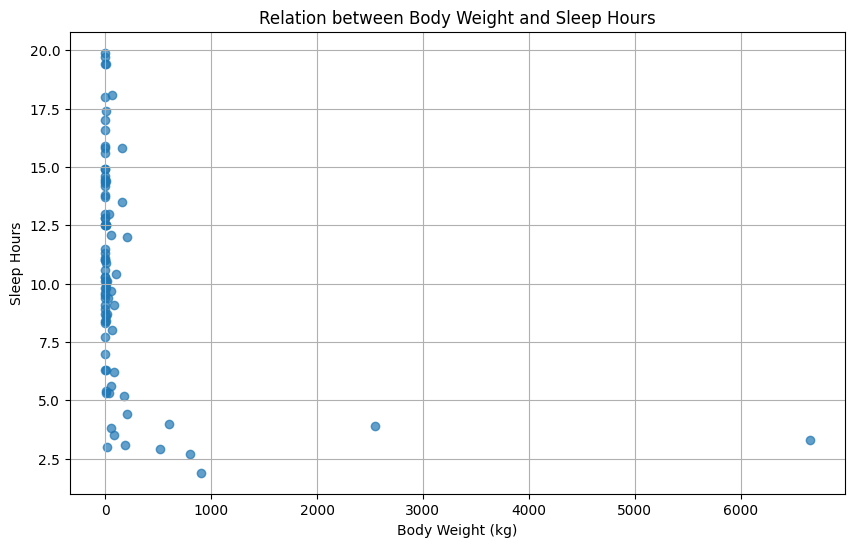

In [554]:

# Optional: Handle outliers (e.g., exclude species with body weight above 6000 kg)
# You can adjust this threshold based on your specific data and needs

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['BodyWt'], df['TotalSleep'], alpha=0.7)
plt.title('Relation between Body Weight and Sleep Hours')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Sleep Hours')
plt.grid(True)
plt.show()

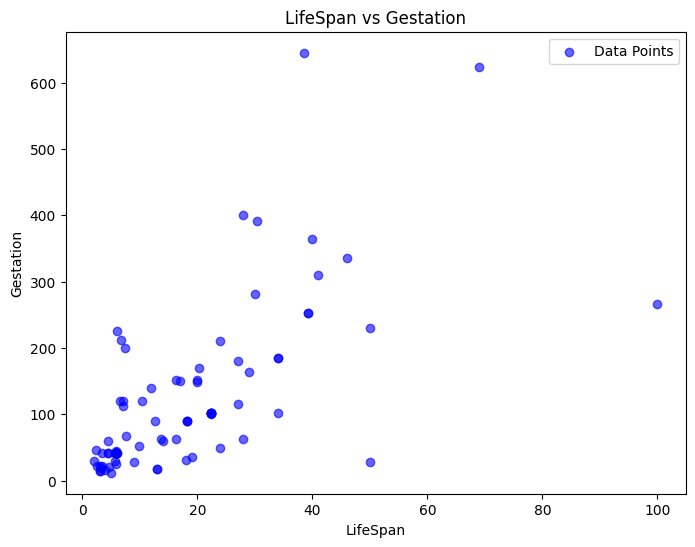

In [555]:
# Create a scatter plot of 'LifeSpan' vs 'Gestation'
plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(df['LifeSpan'], df['Gestation'], label='Data Points', color='blue', alpha=0.6)  # Add scatter plot

# Add labels and title
plt.title('LifeSpan vs Gestation')
plt.xlabel('LifeSpan')
plt.ylabel('Gestation')

# Add legend
plt.legend()

# Show plot
plt.show()


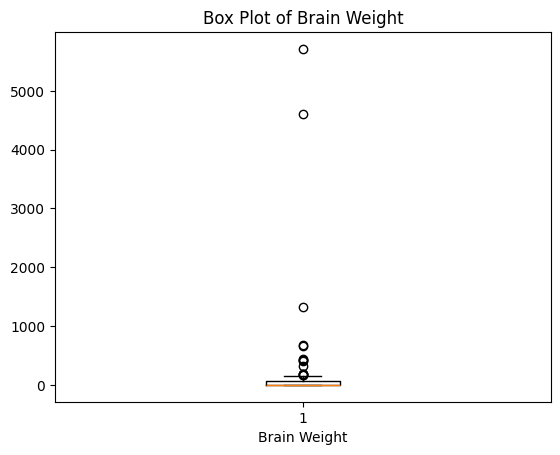

In [556]:
plt.boxplot(df['BrainWt'])  # Create a box plot of 'BrainWt'
# Add labels and title
plt.title('Box Plot of Brain Weight')
plt.xlabel('Brain Weight')
plt.show()


In [557]:
#df[df['BrainWt']==0]

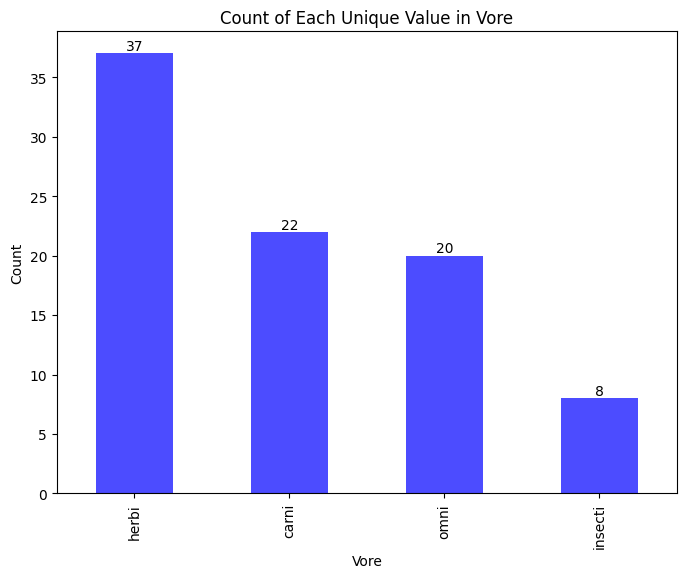

In [558]:
# Plot counts of each unique value in 'Vore'
plt.figure(figsize=(8, 6))  # Set figure size
df['Vore'].value_counts().plot(kind='bar', color='blue', alpha=0.7)  # Create bar plot

# Add labels and title
plt.title('Count of Each Unique Value in Vore')
plt.xlabel('Vore')
plt.ylabel('Count')

# Add value labels on top of each bar
for i, count in enumerate(df['Vore'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show plot
plt.show()


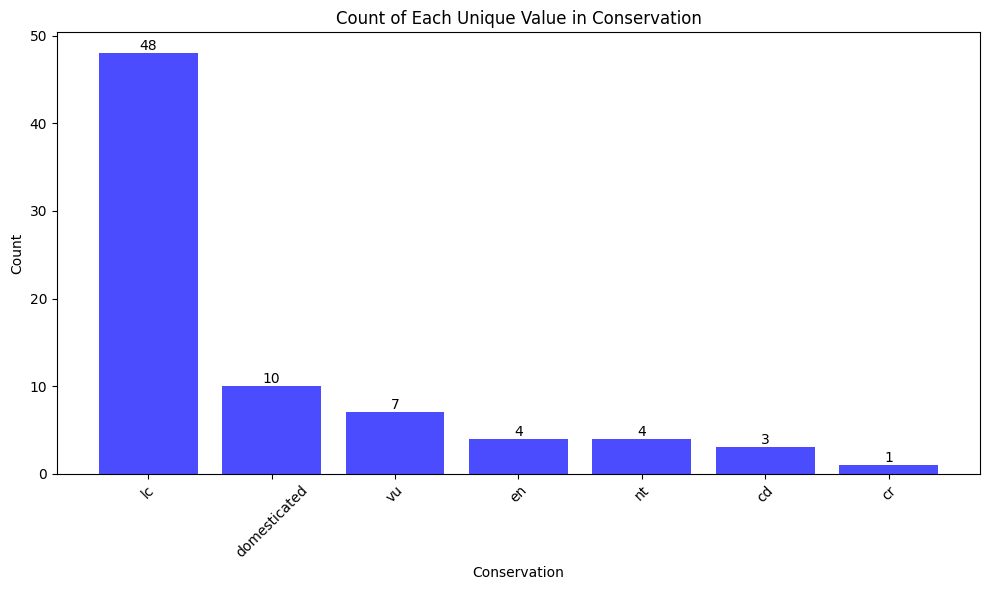

In [559]:
# Create a bar plot of counts for each unique value in the 'Conservation' column
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(x=df['Conservation'].value_counts().index, 
        height=df['Conservation'].value_counts(), 
        color='blue', alpha=0.7)  # Create bar plot

# Add labels and title
plt.title('Count of Each Unique Value in Conservation')
plt.xlabel('Conservation')
plt.ylabel('Count')

# Add value labels on top of each bar
for i, count in enumerate(df['Conservation'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()  # Adjust layout
plt.show()


<Axes: xlabel='Conservation', ylabel='Count'>

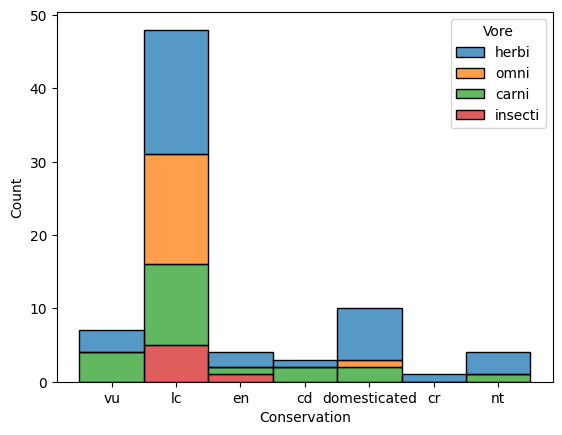

In [560]:
# Create a stacked histogram of 'Conservation' values, with each stack representing a different 'Vore'

sns.histplot(x="Conservation",hue="Vore",multiple="stack",data=df)


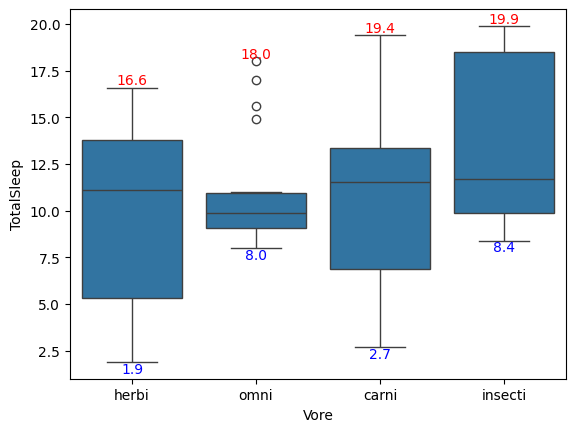

In [561]:
sns.boxplot(x="Vore", y="TotalSleep", data=df)
# Create a box plot of 'TotalSleep' values grouped by 'Vore' category

# Add annotations for min and max values on the box plots
for i in range(len(df['Vore'].unique())):
    vore = df['Vore'].unique()[i]
    subset = df[df['Vore'] == vore]
    max_val = subset['TotalSleep'].max()
    min_val = subset['TotalSleep'].min()
    plt.text(i, max_val, f'{max_val}', ha='center', va='bottom', color='red', fontsize=10)
    plt.text(i, min_val, f'{min_val}', ha='center', va='top', color='blue', fontsize=10)


In [562]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
BodyWt,1.000000,0.925683,-0.310147,0.310119,-0.390767,-0.073439,0.303047,0.665781,0.039630,0.364628,0.132346
BrainWt,0.925683,1.000000,-0.319661,0.319476,-0.376848,-0.062293,0.489420,0.751346,0.026431,0.394048,0.152931
TotalSleep,-0.310147,-0.319661,1.000000,-0.999999,0.915648,0.696638,-0.406572,-0.568782,-0.197300,-0.563543,-0.422235
Awake,0.310119,0.319476,-0.999999,1.000000,-0.915648,-0.696734,0.406428,0.568507,0.196978,0.563211,0.421825
NonDreaming,-0.390767,-0.376848,0.915648,-0.915648,1.000000,0.515062,-0.385887,-0.557029,-0.332149,-0.550287,-0.495562
Dreaming,-0.073439,-0.062293,0.696638,-0.696734,0.515062,1.000000,-0.271841,-0.371211,-0.255097,-0.461249,-0.429225
LifeSpan,0.303047,0.489420,-0.406572,0.406428,-0.385887,-0.271841,1.000000,0.675504,-0.226699,0.429630,0.004141
Gestation,0.665781,0.751346,-0.568782,0.568507,-0.557029,-0.371211,0.675504,1.000000,0.076997,0.681004,0.325272
Predation,0.039630,0.026431,-0.197300,0.196978,-0.332149,-0.255097,-0.226699,0.076997,1.000000,0.501301,0.906940
Exposure,0.364628,0.394048,-0.563543,0.563211,-0.550287,-0.461249,0.429630,0.681004,0.501301,1.000000,0.720241


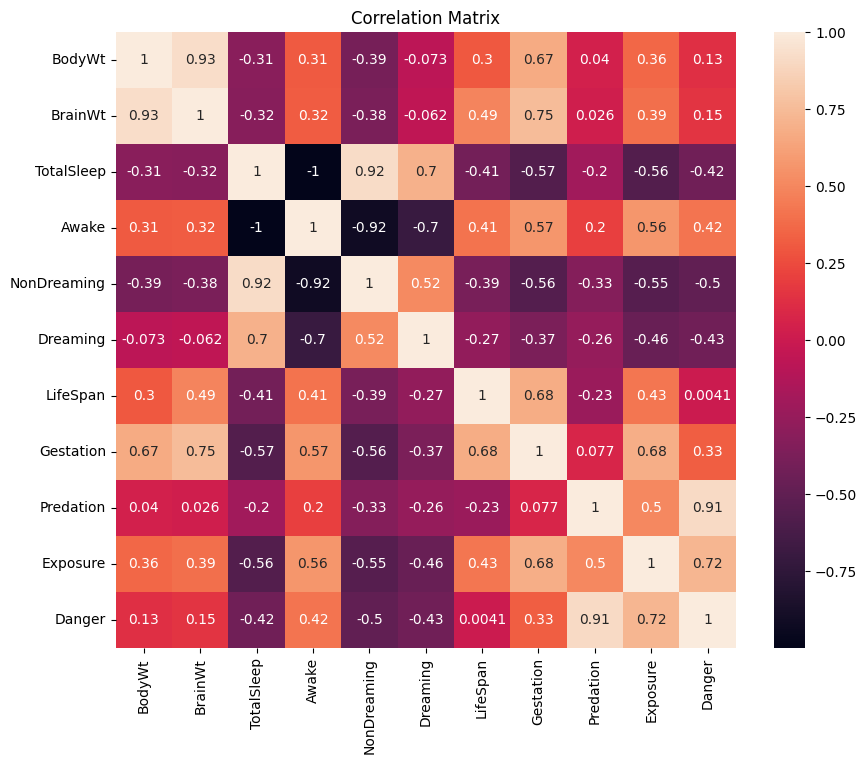

In [563]:
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')  # Add a title if needed
plt.show()


<Axes: xlabel='TotalSleep', ylabel='Count'>

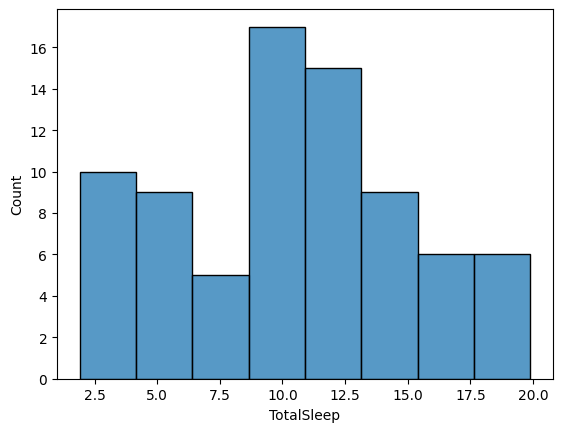

In [564]:
sns.histplot(data.TotalSleep)

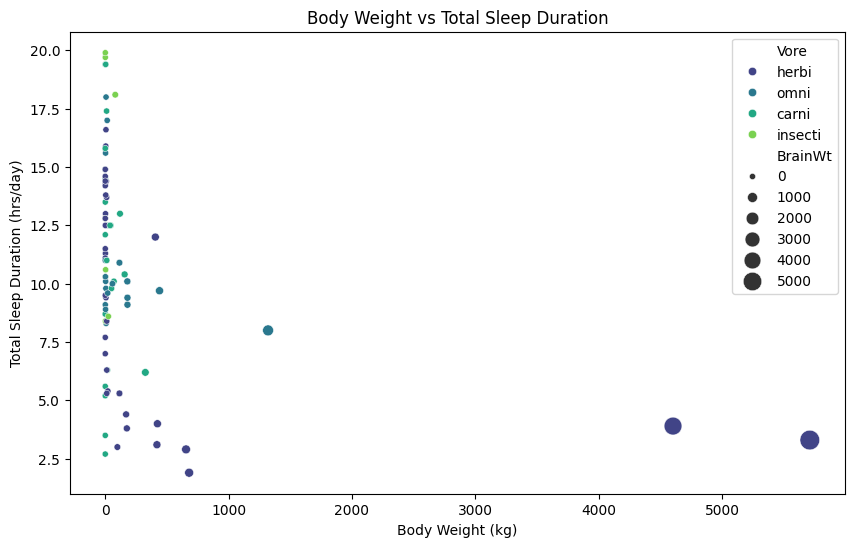

In [565]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BrainWt', y='TotalSleep', data=df, hue='Vore', palette='viridis', size='BrainWt', sizes=(20, 200))
plt.title('Body Weight vs Total Sleep Duration')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Total Sleep Duration (hrs/day)')
plt.show()

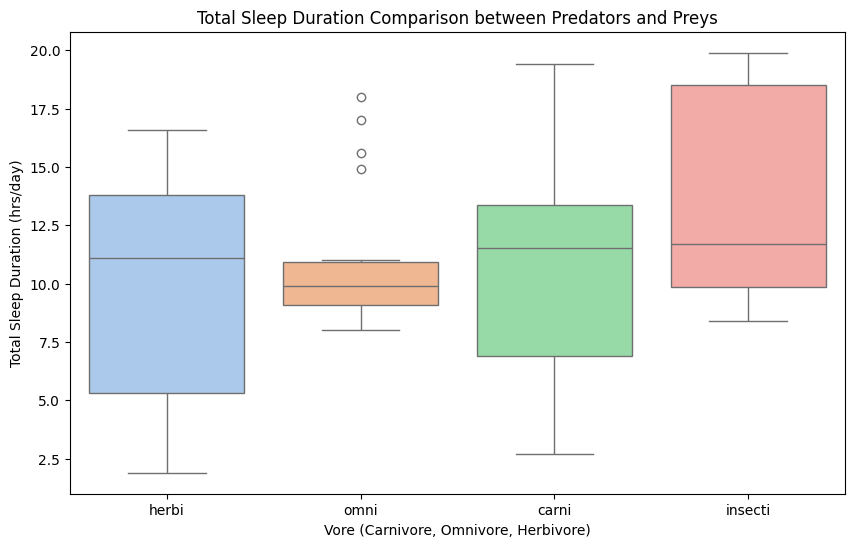

In [566]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vore', y='TotalSleep', data=df, palette='pastel')
plt.title('Total Sleep Duration Comparison between Predators and Preys')
plt.xlabel('Vore (Carnivore, Omnivore, Herbivore)')
plt.ylabel('Total Sleep Duration (hrs/day)')
plt.show()

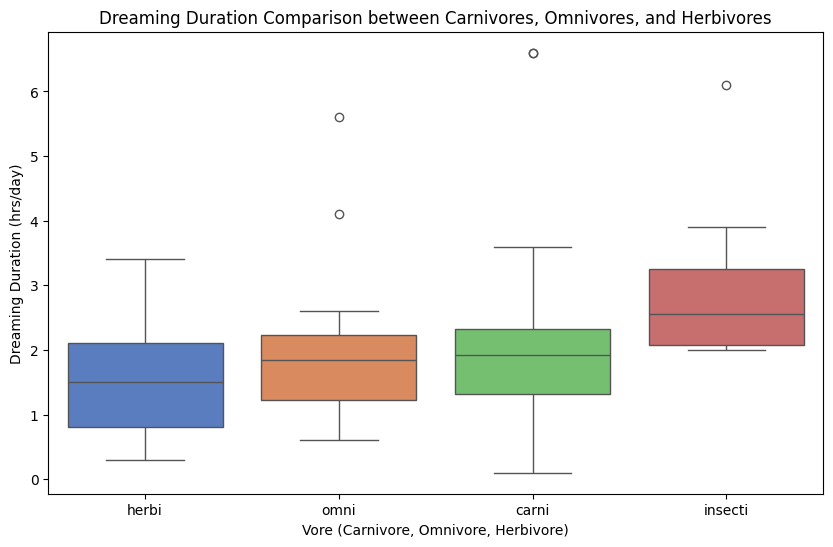

In [567]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vore', y='Dreaming', data=df, palette='muted')
plt.title('Dreaming Duration Comparison between Carnivores, Omnivores, and Herbivores')
plt.xlabel('Vore (Carnivore, Omnivore, Herbivore)')
plt.ylabel('Dreaming Duration (hrs/day)')
plt.show()

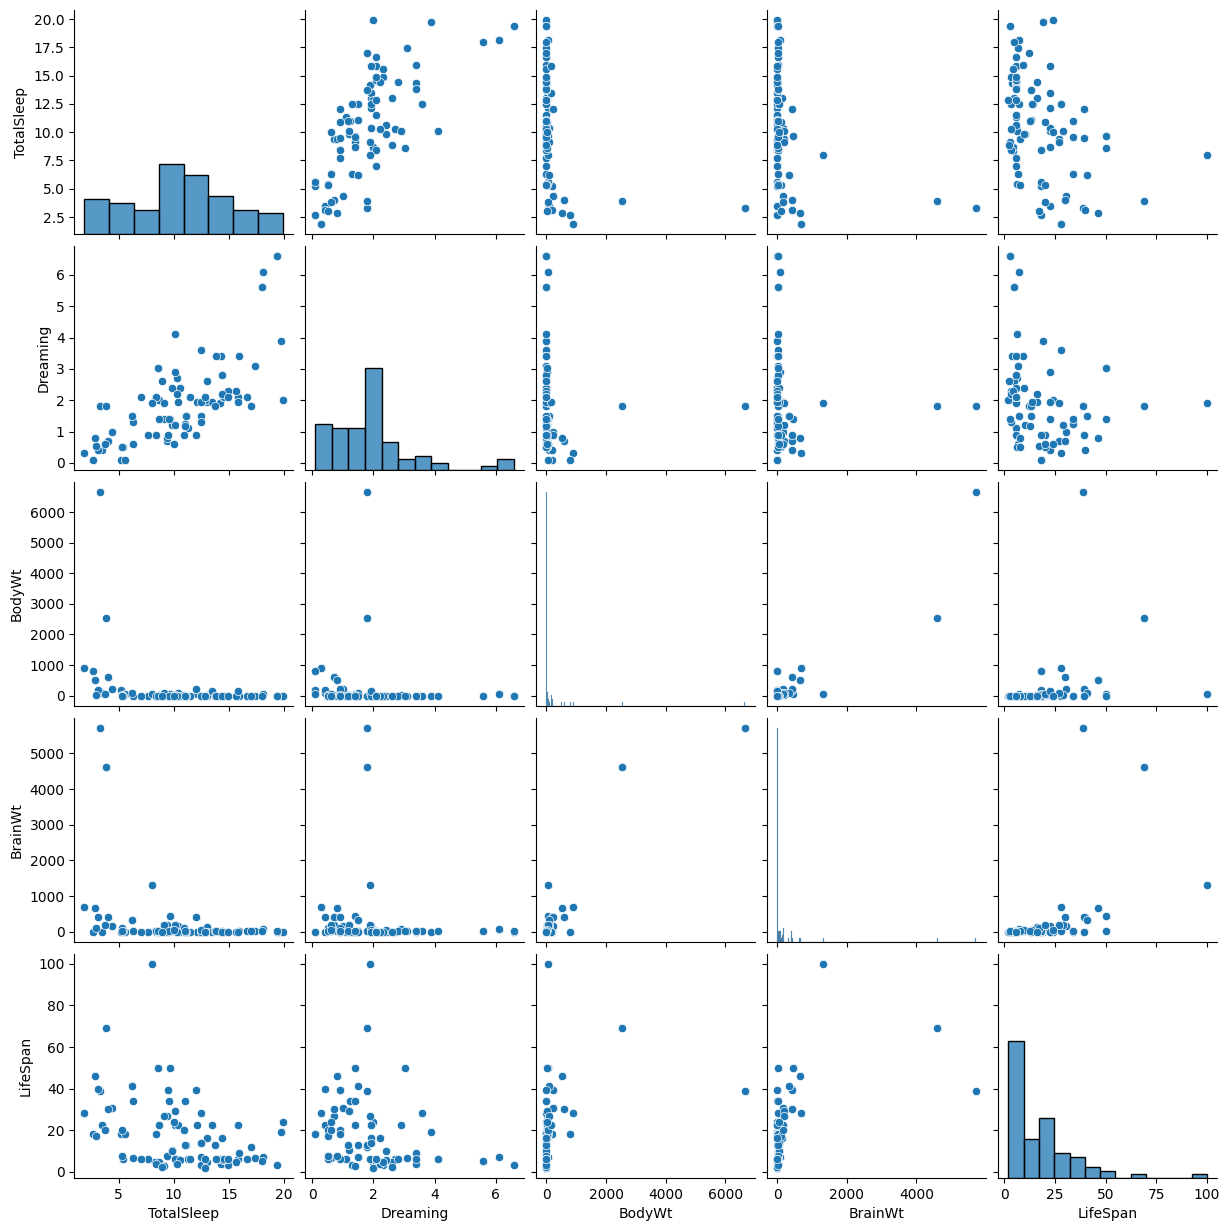

In [568]:
# Explore data distributions and relationships using visualizations
sns.pairplot(df[['TotalSleep', 'Dreaming', 'BodyWt', 'BrainWt', 'LifeSpan']])
plt.show()

<h1 align="center"><b><i>ONE HOT ENCODING </i></b></h1>



In [569]:

# Your existing code for filling missing values...

# Columns to one-hot encode
columns_to_onehot = ["Conservation", "Vore"]

# One-hot encode the specified columns
data = pd.get_dummies(data, columns=columns_to_onehot)

# Now, the "Conservation" and "Vore" columns are one-hot encoded in the DataFrame


In [570]:
data

,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,Conservation_cd,Conservation_cr,Conservation_domesticated,Conservation_en,Conservation_lc,Conservation_nt,Conservation_vu,Vore_carni,Vore_herbi,Vore_insecti,Vore_omni
0,6654.000,5712.0,3.3,1.800000,38.6,645.00,3.000,5.00,3.0,False,False,False,False,False,False,True,False,True,False,False
3,3.380,44.5,12.5,1.928571,14.0,60.00,1.000,1.00,1.0,False,False,False,False,True,False,False,True,False,False,False
4,0.920,5.7,16.6,2.100000,5.9,25.00,5.000,2.00,3.0,False,False,False,False,True,False,False,False,True,False,False
5,2547.000,4603.0,3.9,1.800000,69.0,624.00,3.000,5.00,4.0,False,False,False,True,False,False,False,False,True,False,False
6,25.235,180.0,9.4,0.700000,27.0,180.00,4.000,4.00,4.0,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,4.750,58.0,10.0,0.600000,24.0,210.00,4.000,3.00,4.0,False,False,False,False,True,False,False,False,False,False,True
83,0.045,0.0,7.0,2.100000,5.9,41.75,4.125,1.75,2.9,False,False,False,False,True,False,False,False,True,False,False
84,0.035,0.0,12.8,2.100000,5.9,41.75,4.125,1.75,2.9,False,False,False,False,True,False,False,False,True,False,False
85,3.500,3.9,19.4,6.600000,3.0,14.00,2.000,1.00,1.0,False,False,False,False,True,False,False,True,False,False,False


{'whiskers': [<matplotlib.lines.Line2D at 0x228e03917f0>,
 'caps': [<matplotlib.lines.Line2D at 0x228e0391c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x228e0391640>],
 'medians': [<matplotlib.lines.Line2D at 0x228e03a2190>],
 'fliers': [<matplotlib.lines.Line2D at 0x228e03a2430>],
 'means': []}

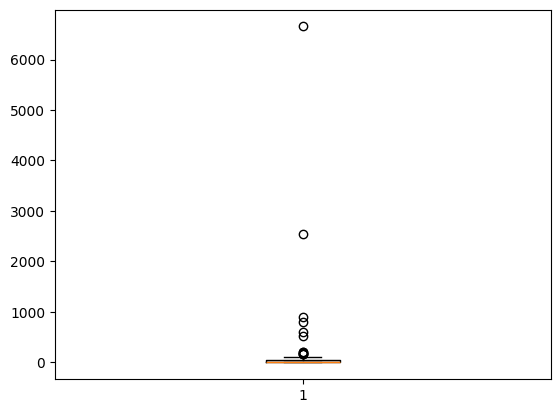

In [571]:
plt.boxplot(data.BodyWt)

{'whiskers': [<matplotlib.lines.Line2D at 0x228e0406100>,
 'caps': [<matplotlib.lines.Line2D at 0x228e0406520>,
 'boxes': [<matplotlib.lines.Line2D at 0x228e03f9e20>],
 'medians': [<matplotlib.lines.Line2D at 0x228e0406a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x228e0406d00>],
 'means': []}

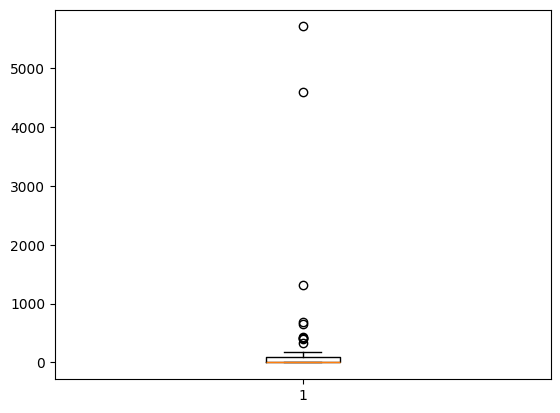

In [572]:
plt.boxplot(data.BrainWt)

{'whiskers': [<matplotlib.lines.Line2D at 0x228e045e9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x228e045eee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x228e03a2940>],
 'medians': [<matplotlib.lines.Line2D at 0x228e0473460>],
 'fliers': [<matplotlib.lines.Line2D at 0x228e0473700>],
 'means': []}

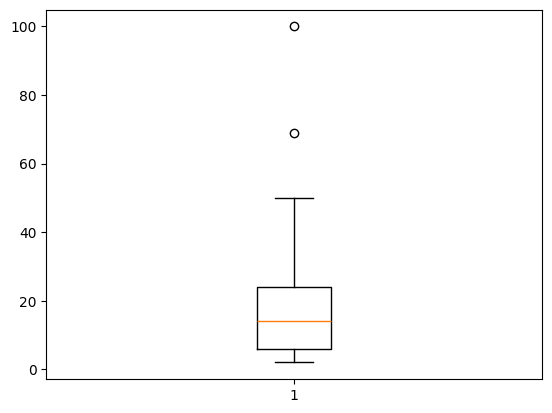

In [573]:
plt.boxplot(data.LifeSpan)

In [574]:
data[data.LifeSpan>60]

,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,Conservation_cd,Conservation_cr,Conservation_domesticated,Conservation_en,Conservation_lc,Conservation_nt,Conservation_vu,Vore_carni,Vore_herbi,Vore_insecti,Vore_omni
5,2547.0,4603.0,3.9,1.8,69.0,624.0,3.0,5.0,4.0,False,False,False,True,False,False,False,False,True,False,False
41,62.0,1320.0,8.0,1.9,100.0,267.0,1.0,1.0,1.0,False,False,False,False,True,False,False,False,False,False,True


<h1 align="center"><b><i>THE MODELING PART</i></b></h1>


### Linear Regression

**Best Parameters:** {}

**Mean Squared Error:** 4.11

**R^2 Score:** 0.79

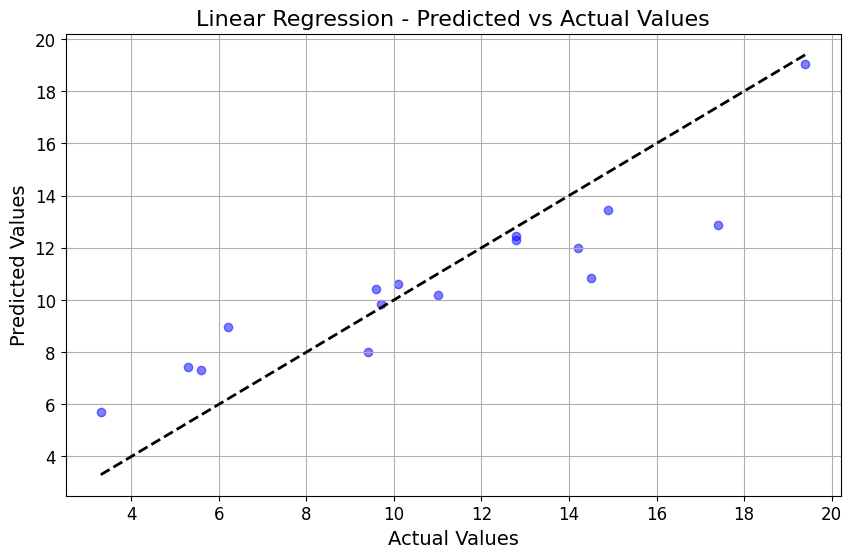

In [575]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

X=data.drop(columns=['TotalSleep'])
y=data['TotalSleep']
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_name = 'Linear Regression'
model = LinearRegression()
params = {}
# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
# Train the best model
best_model.fit(X_train, y_train)
# Predict the target values
y_pred = best_model.predict(X_test)
# Calculate mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the model name, best parameters, mean squared error, and R^2 score
display(Markdown(f"### {model_name}"))
display(Markdown(f"**Best Parameters:** {grid_search.best_params_}"))
display(Markdown(f"**Mean Squared Error:** {mse:.2f}"))
display(Markdown(f"**R^2 Score:** {r2:.2f}"))
# Visualization of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title(f'{model_name} - Predicted vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()
print('\n')

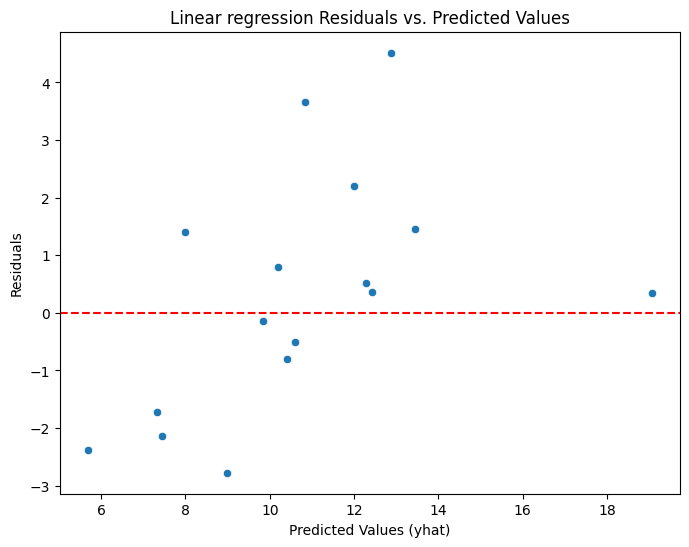

In [576]:
# Calculate residuals
residuals = y_test - y_pred

# Create a scatter plot of predicted values vs. residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Linear regression Residuals vs. Predicted Values')
plt.xlabel('Predicted Values (yhat)')
plt.ylabel('Residuals')
plt.show()

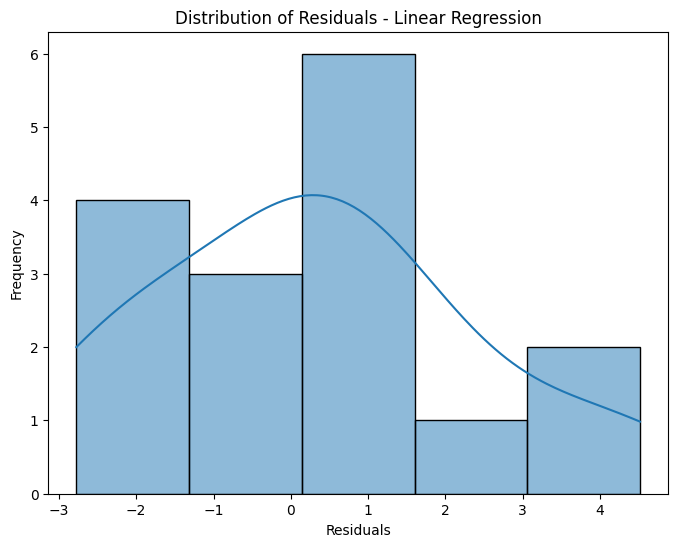

In [577]:
plt.figure(figsize=(8, 6))

# Create a histogram plot of residuals with kernel density estimation for Linear Regression
sns.histplot(residuals, kde=True)

# Set plot title and axis labels for Linear Regression
plt.title('Distribution of Residuals - Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot for Linear Regression
plt.show()

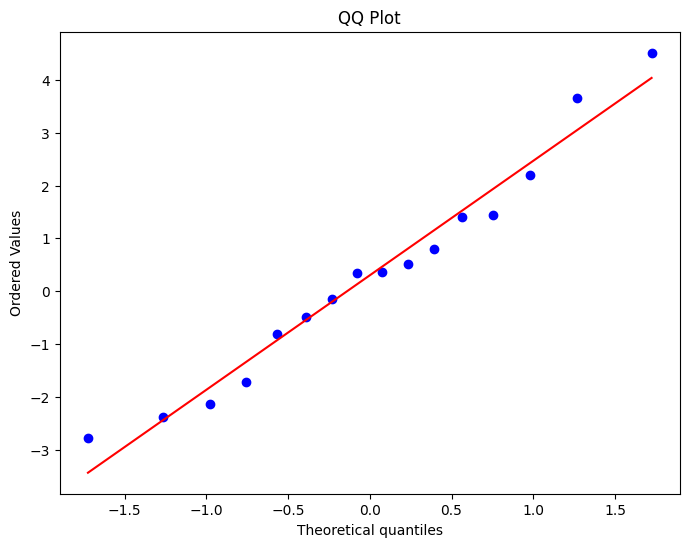

In [578]:
from scipy.stats import probplot

# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Generate a Q-Q plot of the residuals
probplot(residuals, plot=plt)

# Set plot title
plt.title('QQ Plot')

# Show the plot
plt.show()


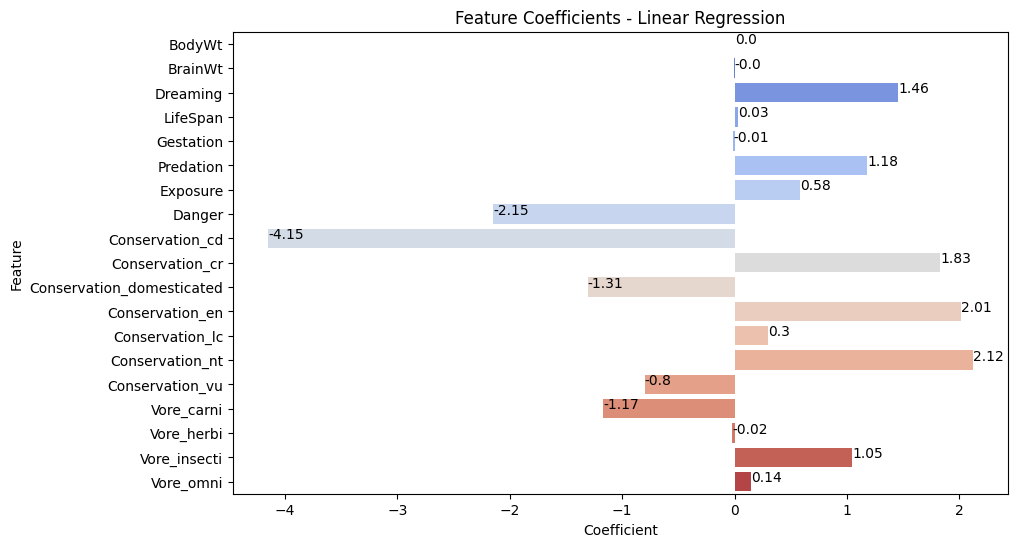

In [579]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Fit the Linear Regression model to your data
model.fit(X_train, y_train)

# Create a DataFrame to store feature coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

# Create a color palette for the bar plot
colors = sns.color_palette("coolwarm", len(coef_df))

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot feature coefficients with different colors
barplot = sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette=colors)

# Set plot title and axis labels
plt.title('Feature Coefficients - Linear Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')

# Add coefficient values on top of the bars
for i, val in enumerate(coef_df['Coefficient']):
    barplot.text(val, i, round(val, 2), color='black', ha="left")

# Show the plot
plt.show()


<h2 align="center"><b><i>Ridge Regression</i></b></h2>


### Ridge Regression

**Best Parameters:** {'alpha': 10.0}

**Mean Squared Error:** 12.19

**R^2 Score:** 0.36

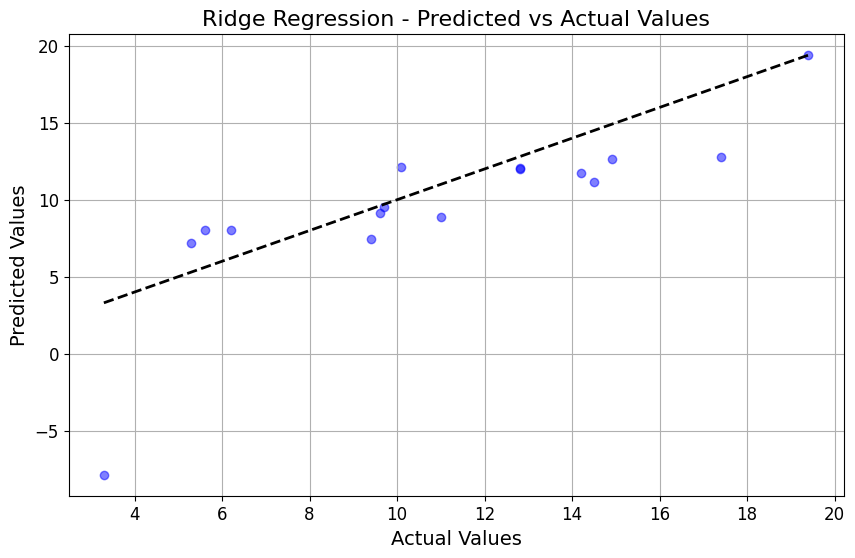

In [580]:

def display_markdown(text):
    display(Markdown(text))

# Ridge Regression
display_markdown("### Ridge Regression")
model_ridge = Ridge()
params_ridge = {'alpha': [0.1, 1.0, 10.0]}
grid_search_ridge = GridSearchCV(model_ridge, params_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
best_model_ridge = grid_search_ridge.best_estimator_
best_model_ridge.fit(X_train, y_train)
y_pred_ridge = best_model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
display_markdown(f"**Best Parameters:** {grid_search_ridge.best_params_}")
display_markdown(f"**Mean Squared Error:** {mse_ridge:.2f}")
display_markdown(f"**R^2 Score:** {r2_ridge:.2f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('Ridge Regression - Predicted vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()
print('\n')


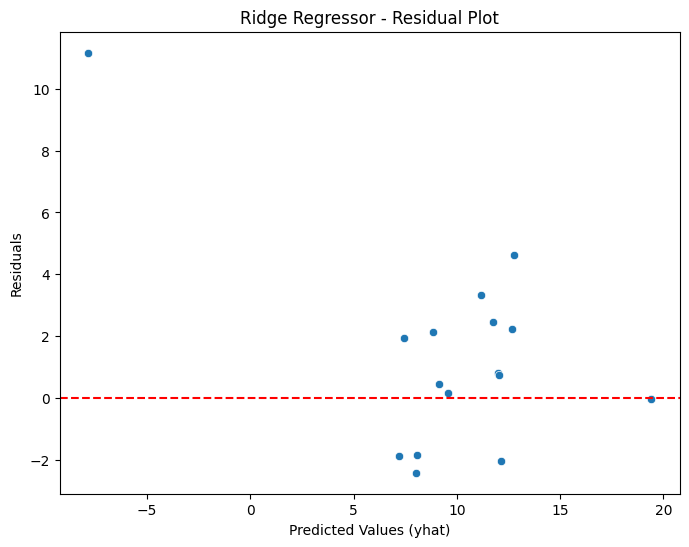

In [581]:
# Create a scatter plot of predicted values vs. residuals
residuals_ridge=y_test - y_pred_ridge
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Ridge Regressor - Residual Plot')
plt.xlabel('Predicted Values (yhat)')
plt.ylabel('Residuals')
plt.show()

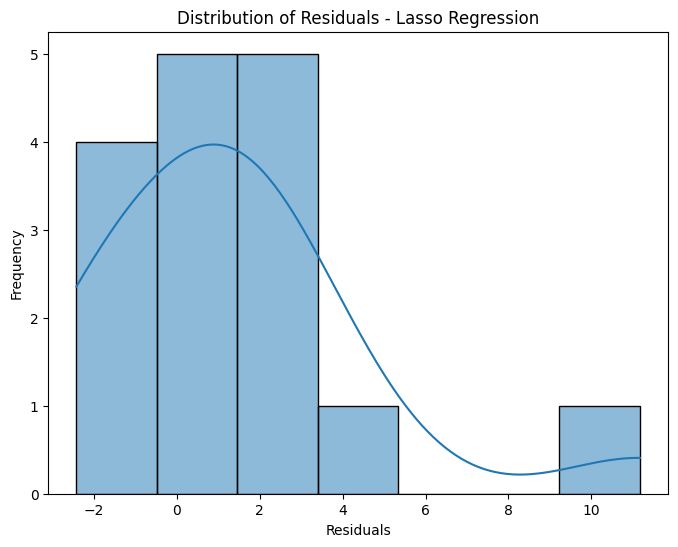

In [582]:
plt.figure(figsize=(8, 6))

# Create a histogram plot of residuals with kernel density estimation for Lasso Regression
sns.histplot(residuals_ridge, kde=True)

# Set plot title and axis labels for Lasso Regression
plt.title('Distribution of Residuals - Lasso Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot for Lasso Regression
plt.show()

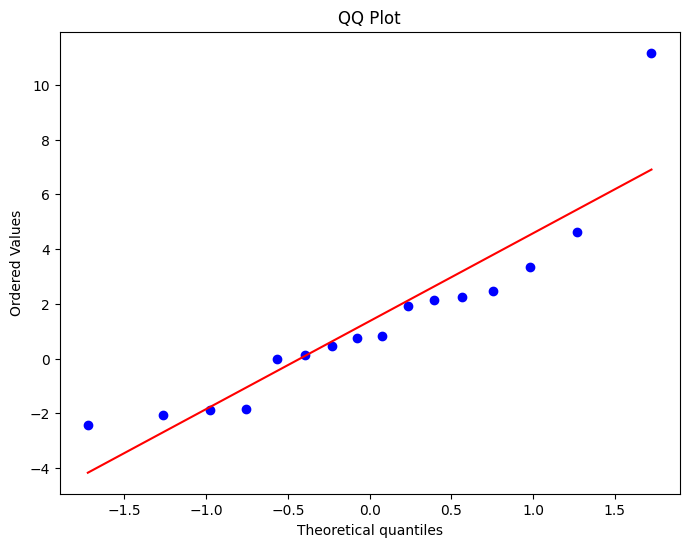

In [583]:

# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Generate a Q-Q plot of the residuals
probplot(residuals_ridge, plot=plt)

# Set plot title
plt.title('QQ Plot')

# Show the plot
plt.show()


<h2 align="center"><b><i>Lasso Regression</i></b></h2>


### Lasso Regression

**Best Parameters:** {'alpha': 1.0}

**Mean Squared Error:** 18.57

**R^2 Score:** 0.03

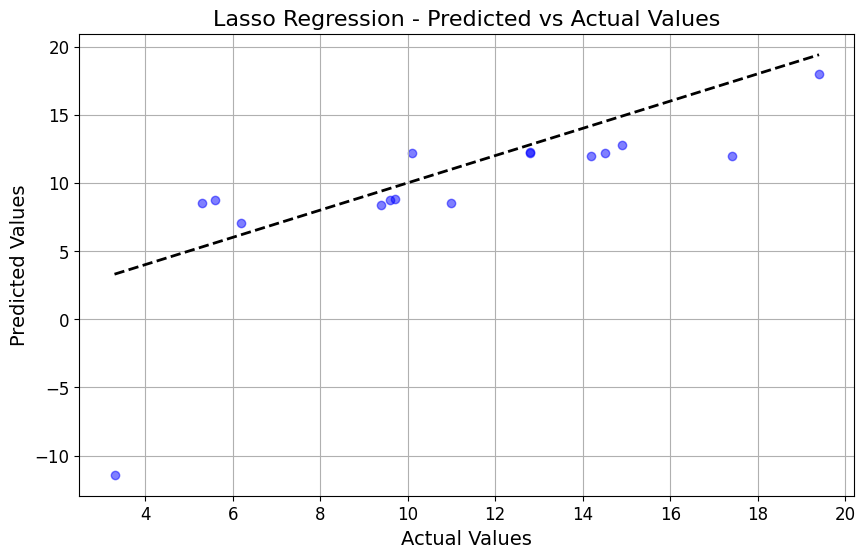

In [584]:
# Lasso Regression
display_markdown("### Lasso Regression")
model_lasso = Lasso()
params_lasso = {'alpha': [0.1, 1.0, 10.0]}
grid_search_lasso = GridSearchCV(model_lasso, params_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)
best_model_lasso = grid_search_lasso.best_estimator_
best_model_lasso.fit(X_train, y_train)
y_pred_lasso = best_model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
display_markdown(f"**Best Parameters:** {grid_search_lasso.best_params_}")
display_markdown(f"**Mean Squared Error:** {mse_lasso:.2f}")
display_markdown(f"**R^2 Score:** {r2_lasso:.2f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('Lasso Regression - Predicted vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()
print('\n')

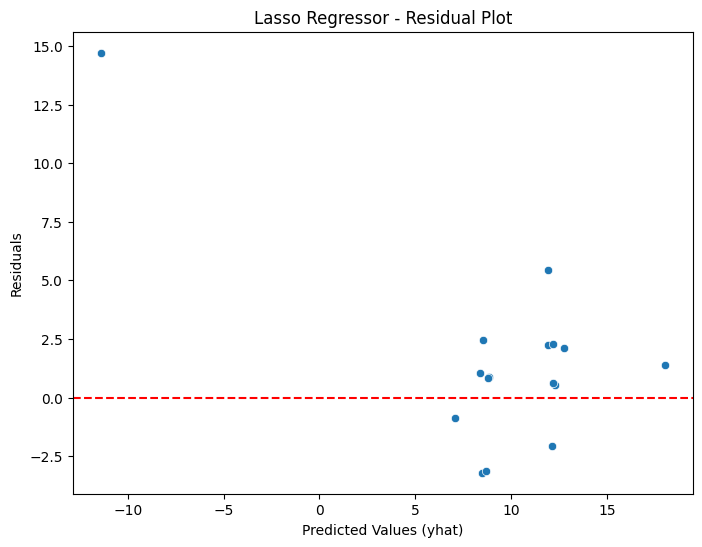

In [585]:
# Create a scatter plot of predicted values vs. residuals
residuals_lasso=y_test - y_pred_lasso
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_lasso, y=residuals_lasso)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Lasso Regressor - Residual Plot')
plt.xlabel('Predicted Values (yhat)')
plt.ylabel('Residuals')
plt.show()

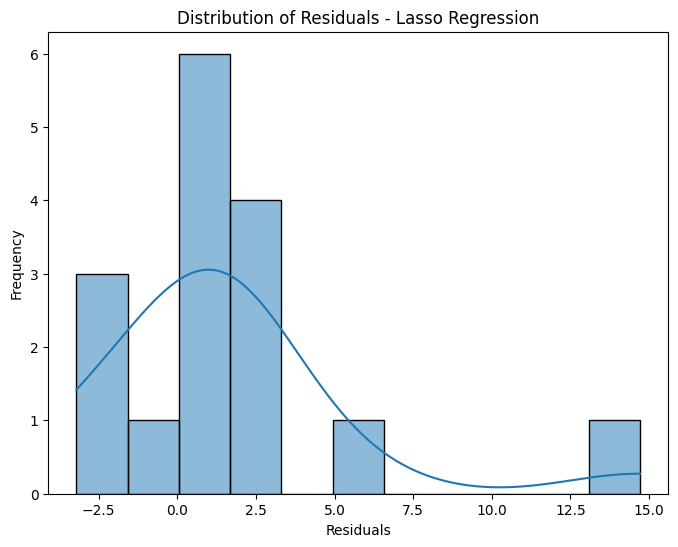

In [586]:
plt.figure(figsize=(8, 6))

# Create a histogram plot of residuals with kernel density estimation for Lasso Regression
sns.histplot(residuals_lasso, kde=True)

# Set plot title and axis labels for Lasso Regression
plt.title('Distribution of Residuals - Lasso Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot for Lasso Regression
plt.show()

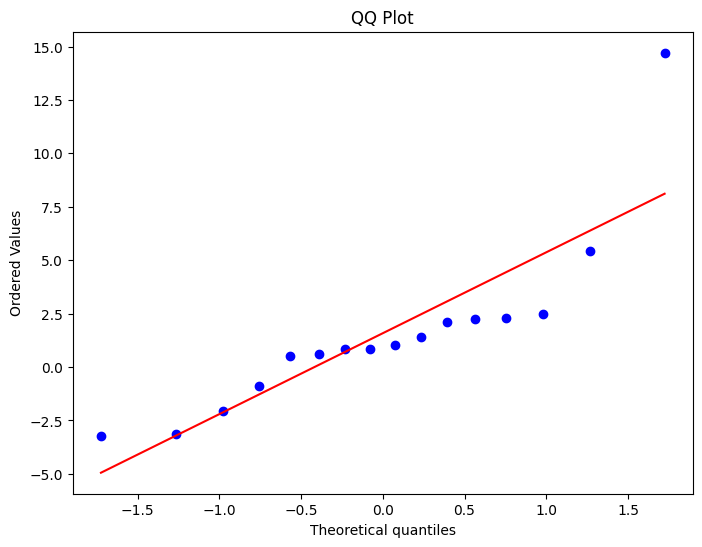

In [587]:

# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Generate a Q-Q plot of the residuals
probplot(residuals_lasso, plot=plt)

# Set plot title
plt.title('QQ Plot')

# Show the plot
plt.show()


<h2 align="center"><b><i>Kneighbors Regression</i></b></h2>


### KNeighbors Regressor

**Best Parameters:** {'n_neighbors': 7}

**Mean Squared Error:** 8.42

**R^2 Score:** 0.56

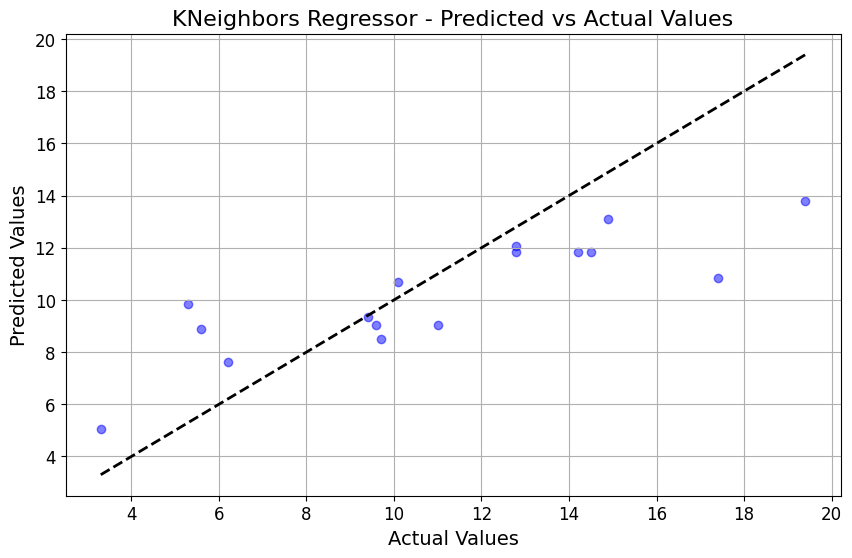

In [588]:
# KNeighbors Regressor
display_markdown("### KNeighbors Regressor")
model_knn = KNeighborsRegressor()
params_knn = {'n_neighbors': [3, 5, 7]}
grid_search_knn = GridSearchCV(model_knn, params_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)
best_model_knn = grid_search_knn.best_estimator_
best_model_knn.fit(X_train, y_train)
y_pred_knn = best_model_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
display_markdown(f"**Best Parameters:** {grid_search_knn.best_params_}")
display_markdown(f"**Mean Squared Error:** {mse_knn:.2f}")
display_markdown(f"**R^2 Score:** {r2_knn:.2f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('KNeighbors Regressor - Predicted vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()
print('\n')


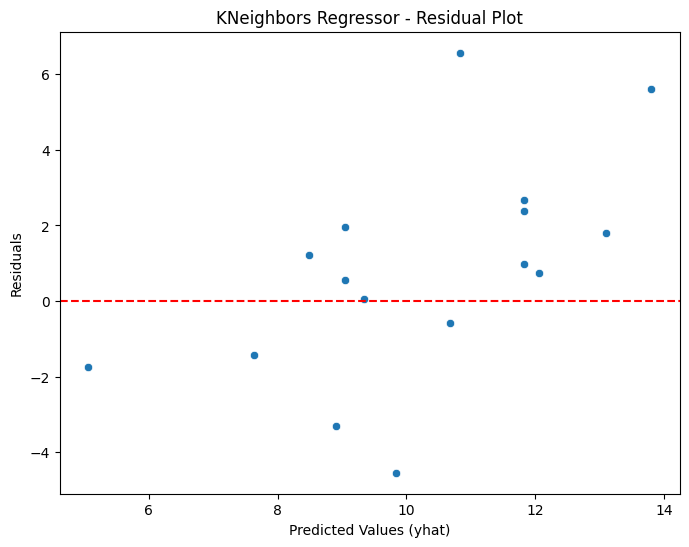

In [589]:
# Create a scatter plot of predicted values vs. residuals
residuals_knn=y_test - y_pred_knn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_knn, y=residuals_knn)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('KNeighbors Regressor - Residual Plot')
plt.xlabel('Predicted Values (yhat)')
plt.ylabel('Residuals')
plt.show()

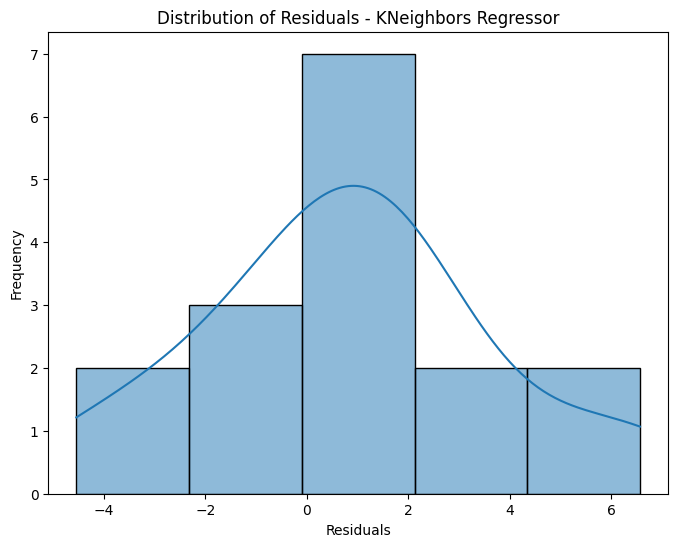

In [590]:
# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Create a histogram plot of residuals with kernel density estimation
sns.histplot(residuals_knn, kde=True)

# Set plot title and axis labels
plt.title('Distribution of Residuals - KNeighbors Regressor')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot
plt.show()


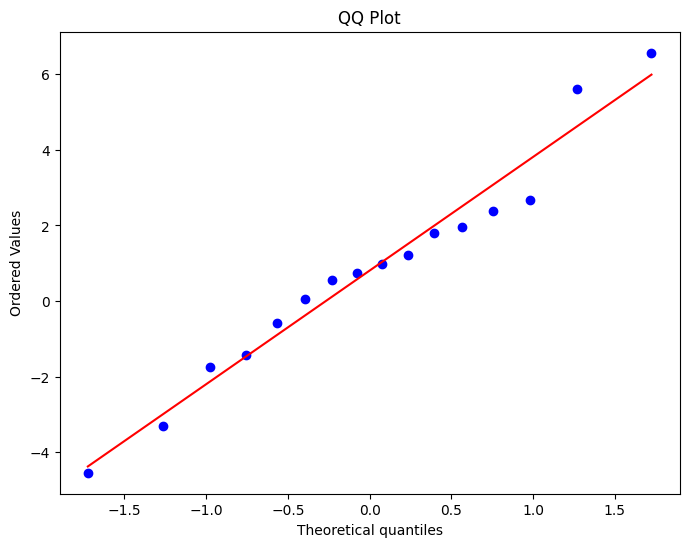

In [591]:

# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Generate a Q-Q plot of the residuals
probplot(residuals_knn, plot=plt)

# Set plot title
plt.title('QQ Plot')

# Show the plot
plt.show()


<h2 align="center"><b><i>Decision Tree Regression</i></b></h2>


### Decision Tree Regressor

**Best Parameters:** {'max_depth': None}

**Mean Squared Error:** 14.26

**R^2 Score:** 0.26

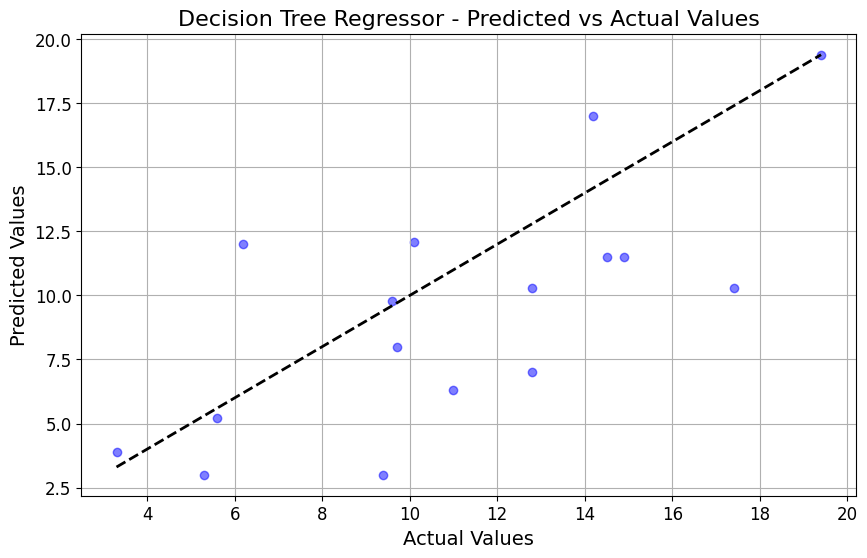

In [592]:
# Decision Tree Regressor
display_markdown("### Decision Tree Regressor")
model_dt = DecisionTreeRegressor()
params_dt = {'max_depth': [None, 5, 10]}
grid_search_dt = GridSearchCV(model_dt, params_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)
best_model_dt = grid_search_dt.best_estimator_
best_model_dt.fit(X_train, y_train)
y_pred_dt = best_model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
display_markdown(f"**Best Parameters:** {grid_search_dt.best_params_}")
display_markdown(f"**Mean Squared Error:** {mse_dt:.2f}")
display_markdown(f"**R^2 Score:** {r2_dt:.2f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('Decision Tree Regressor - Predicted vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()
print('\n')


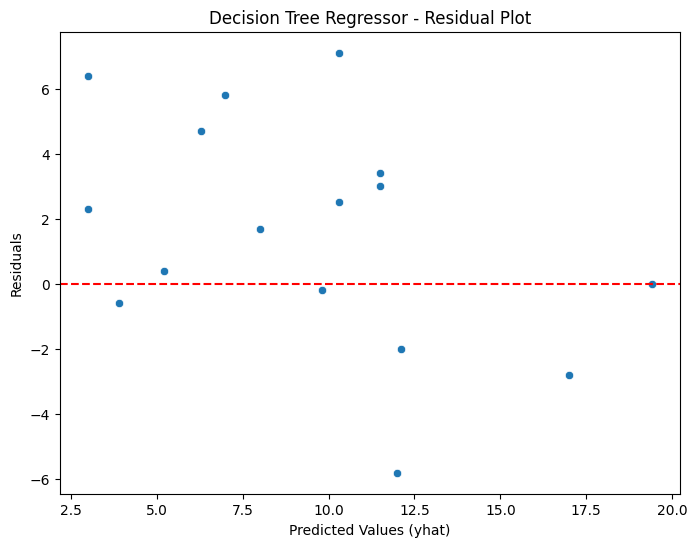

In [593]:
residuals_dt= y_test - y_pred_dt
# Create a scatter plot of predicted values vs. residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_dt, y=residuals_dt)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Decision Tree Regressor - Residual Plot')
plt.xlabel('Predicted Values (yhat)')
plt.ylabel('Residuals')
plt.show()

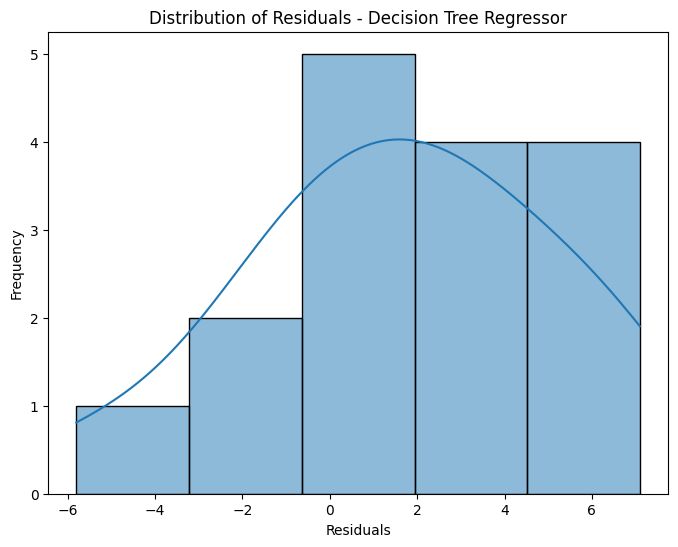

In [594]:
# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Create a histogram plot of residuals with kernel density estimation
sns.histplot(residuals_dt, kde=True)

# Set plot title and axis labels
plt.title('Distribution of Residuals - Decision Tree Regressor')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot
plt.show()


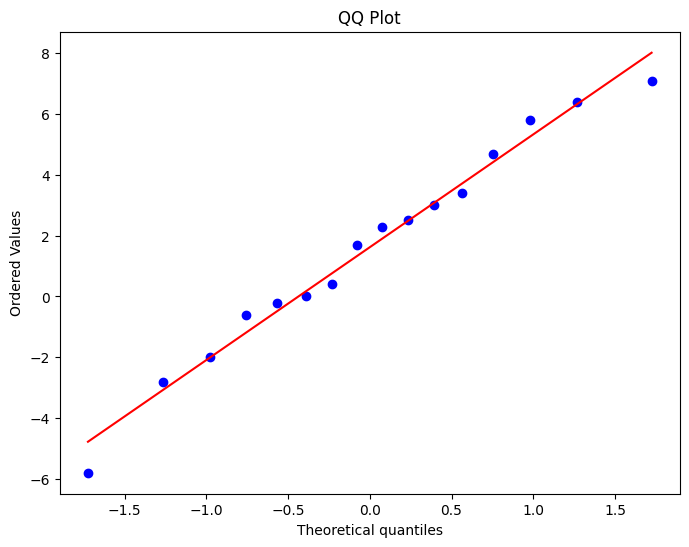

In [595]:

# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Generate a Q-Q plot of the residuals
probplot(residuals_dt, plot=plt)

# Set plot title
plt.title('QQ Plot')

# Show the plot
plt.show()


<h2 align="center"><b><i>Random Forest Regression</i></b></h2>


### Random Forest Regressor

**Best Parameters:** {'max_depth': 10, 'n_estimators': 100}

**Mean Squared Error:** 5.96

**R^2 Score:** 0.69

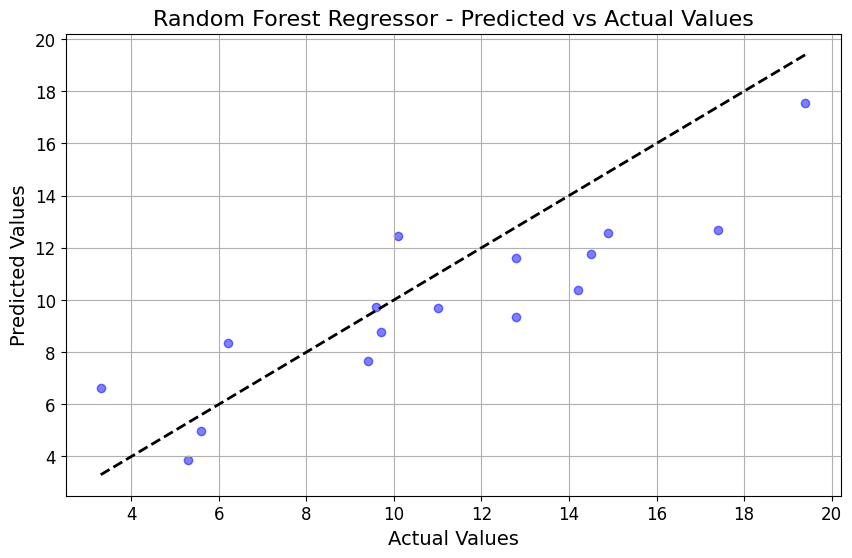

In [596]:
# Random Forest Regressor
display_markdown("### Random Forest Regressor")
model_rf = RandomForestRegressor()
params_rf = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}
grid_search_rf = GridSearchCV(model_rf, params_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_
best_model_rf.fit(X_train, y_train)
y_pred_rf = best_model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
display_markdown(f"**Best Parameters:** {grid_search_rf.best_params_}")
display_markdown(f"**Mean Squared Error:** {mse_rf:.2f}")
display_markdown(f"**R^2 Score:** {r2_rf:.2f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('Random Forest Regressor - Predicted vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()
print('\n')



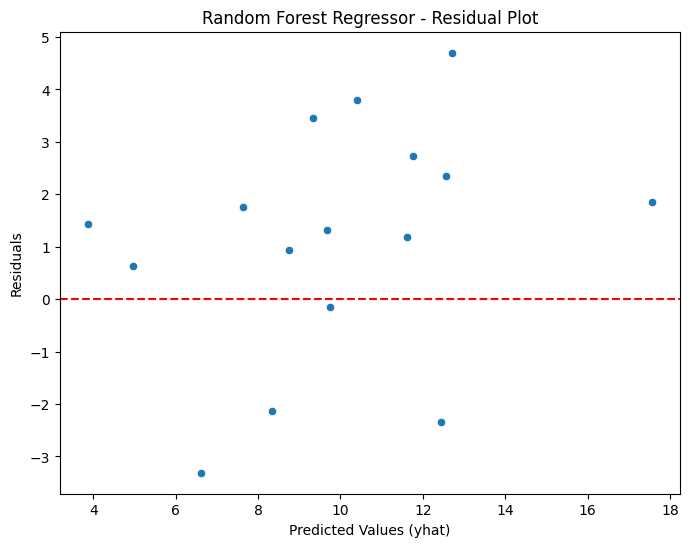

In [597]:
# Calculate residuals
residuals_rf = y_test - y_pred_rf

# Create a scatter plot of predicted values vs. residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Random Forest Regressor - Residual Plot')
plt.xlabel('Predicted Values (yhat)')
plt.ylabel('Residuals')
plt.show()

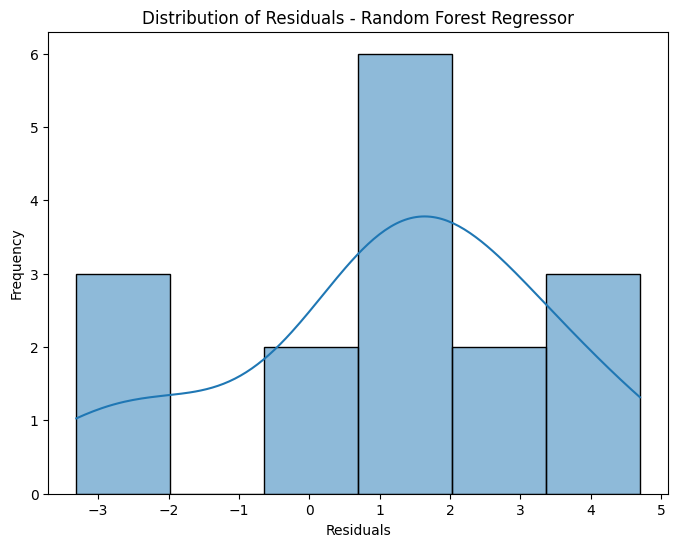

In [598]:
# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Create a histogram plot of residuals with kernel density estimation
sns.histplot(residuals_rf, kde=True)

# Set plot title and axis labels
plt.title('Distribution of Residuals - Random Forest Regressor')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot
plt.show()


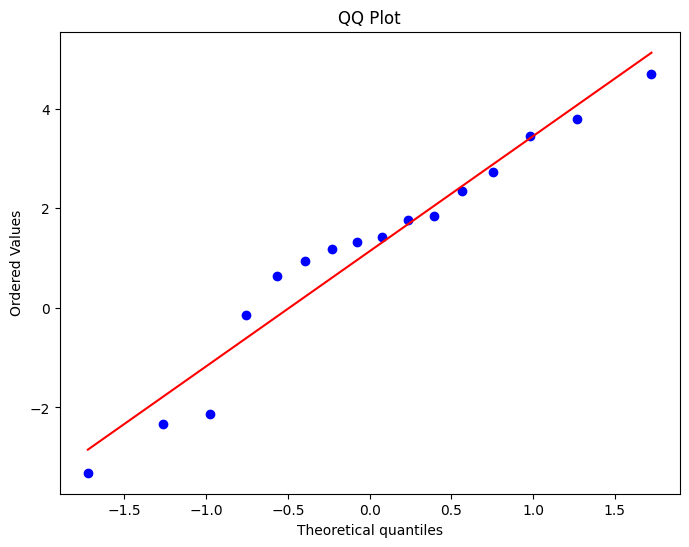

In [599]:

# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Generate a Q-Q plot of the residuals
probplot(residuals_rf, plot=plt)

# Set plot title
plt.title('QQ Plot')

# Show the plot
plt.show()


<h2 align="center"><b><i>Gradient Boosting Regression</i></b></h2>


### Gradient Boosting Regressor

**Best Parameters:** {'learning_rate': 0.01, 'n_estimators': 200}

**Mean Squared Error:** 3.82

**R^2 Score:** 0.80

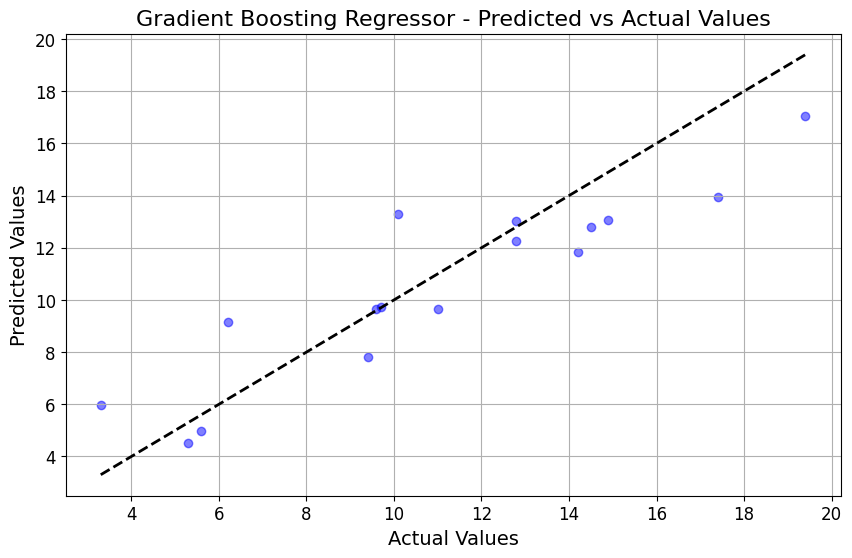

In [600]:
# Gradient Boosting Regressor
display_markdown("### Gradient Boosting Regressor")
model_gb = GradientBoostingRegressor()
params_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}
grid_search_gb = GridSearchCV(model_gb, params_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)
best_model_gb = grid_search_gb.best_estimator_
best_model_gb.fit(X_train, y_train)
y_pred_gb = best_model_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
display_markdown(f"**Best Parameters:** {grid_search_gb.best_params_}")
display_markdown(f"**Mean Squared Error:** {mse_gb:.2f}")
display_markdown(f"**R^2 Score:** {r2_gb:.2f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('Gradient Boosting Regressor - Predicted vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()
print('\n')


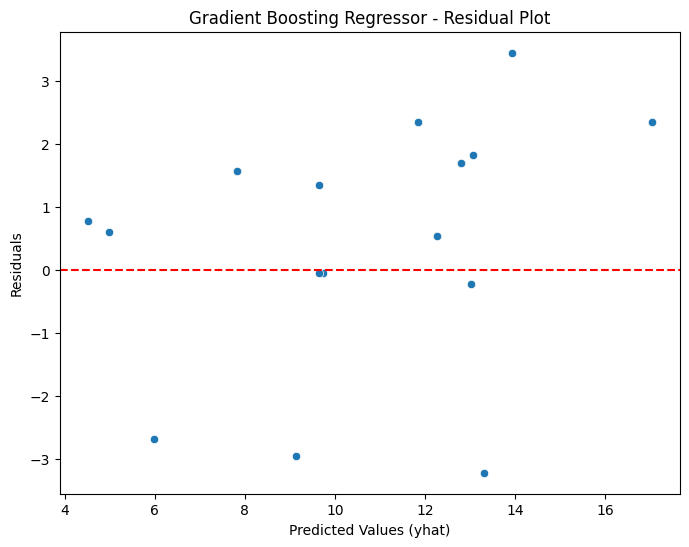

In [601]:
# Calculate residuals
residuals_gb = y_test - y_pred_gb

# Create a scatter plot of predicted values vs. residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_gb, y=residuals_gb)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Gradient Boosting Regressor - Residual Plot')
plt.xlabel('Predicted Values (yhat)')
plt.ylabel('Residuals')
plt.show()

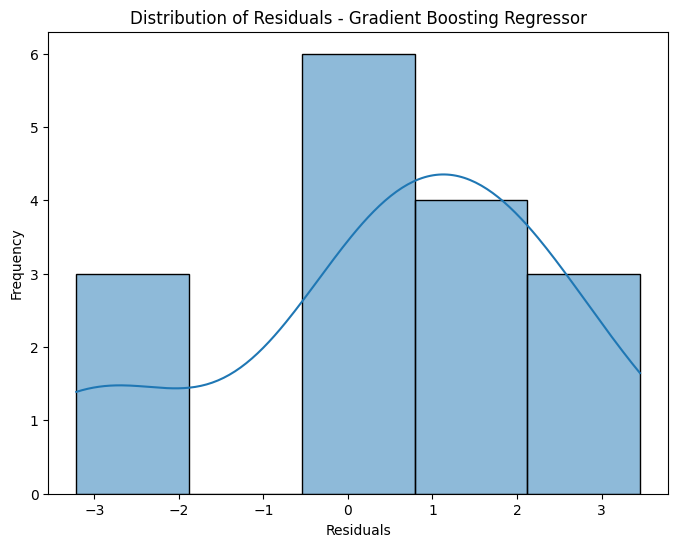

In [602]:
# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Create a histogram plot of residuals with kernel density estimation
sns.histplot(residuals_gb, kde=True)

# Set plot title and axis labels
plt.title('Distribution of Residuals - Gradient Boosting Regressor')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot
plt.show()


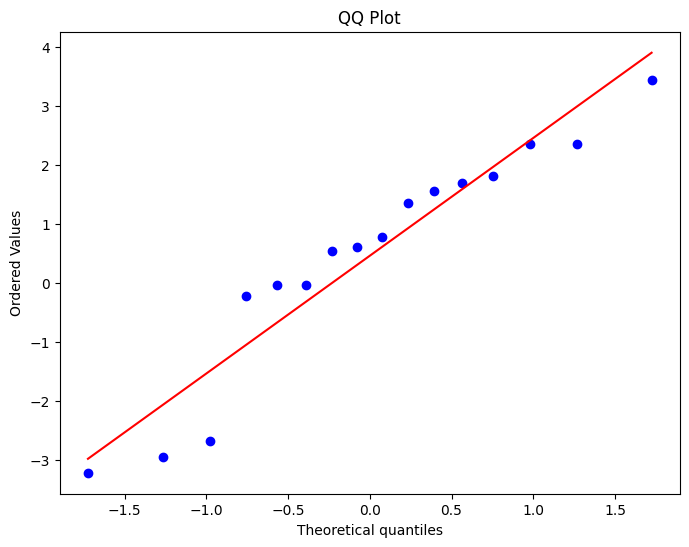

In [603]:

# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Generate a Q-Q plot of the residuals
probplot(residuals_gb, plot=plt)

# Set plot title
plt.title('QQ Plot')

# Show the plot
plt.show()


<h2 align="center"><b><i>XGBOOST Regression</i></b></h2>


### XGBoost Regressor

**Best Parameters:** {'learning_rate': 0.1, 'n_estimators': 200}

**Mean Squared Error:** 7.62

**R^2 Score:** 0.60

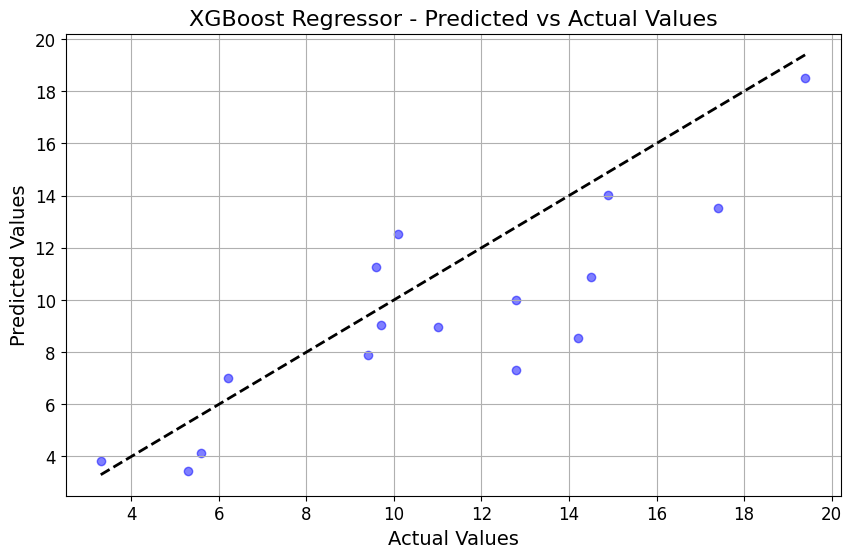

In [604]:
# XGBoost Regressor
display_markdown("### XGBoost Regressor")
model_xgb = xgb.XGBRegressor()
params_xgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}
grid_search_xgb = GridSearchCV(model_xgb, params_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)
best_model_xgb = grid_search_xgb.best_estimator_
best_model_xgb.fit(X_train, y_train)
y_pred_xgb = best_model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
display_markdown(f"**Best Parameters:** {grid_search_xgb.best_params_}")
display_markdown(f"**Mean Squared Error:** {mse_xgb:.2f}")
display_markdown(f"**R^2 Score:** {r2_xgb:.2f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('XGBoost Regressor - Predicted vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()
print('\n')


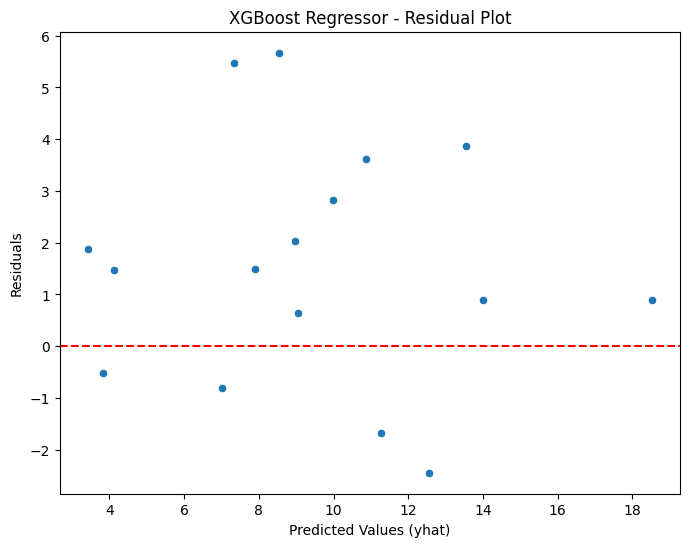

In [605]:
# Calculate residuals
residuals_xgb = y_test - y_pred_xgb

# Create a scatter plot of predicted values vs. residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('XGBoost Regressor - Residual Plot')
plt.xlabel('Predicted Values (yhat)')
plt.ylabel('Residuals')
plt.show()

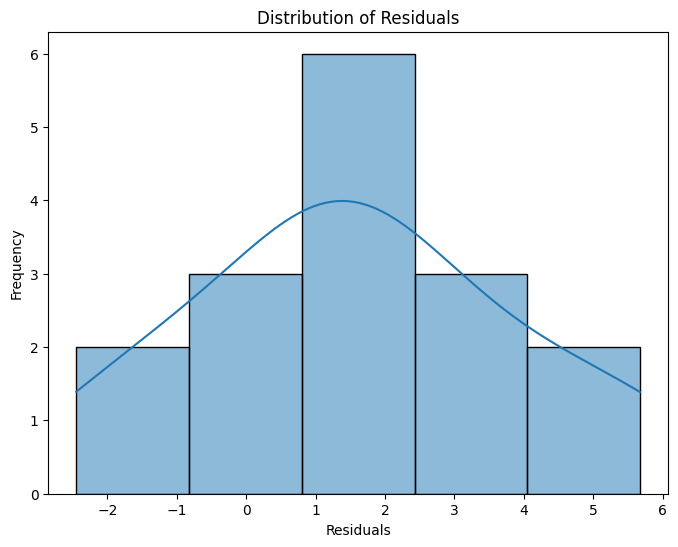

In [606]:
# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Create a histogram plot of residuals with kernel density estimation
sns.histplot(residuals_xgb, kde=True)

# Set plot title and axis labels
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot
plt.show()


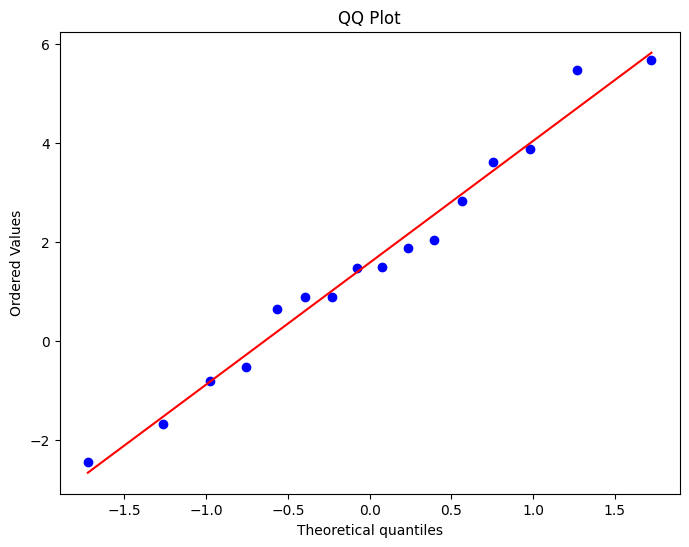

In [607]:

# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Generate a Q-Q plot of the residuals
probplot(residuals_xgb, plot=plt)

# Set plot title
plt.title('QQ Plot')

# Show the plot
plt.show()


<h1 align="center"><b><i>CLASSIFICATION PROBLEM</i></b></h1>


In [608]:
sorted(data['TotalSleep'].unique())[0:20]

[1.9,
 2.7,
 2.9,
 3.0,
 3.1,
 3.3,
 3.5,
 3.8,
 3.9,
 4.0,
 4.4,
 5.2,
 5.3,
 5.4,
 5.6,
 6.2,
 6.3,
 7.0,
 7.7,
 8.0]

#### Custom Binning and Categorization of Total Sleep Duration

In [609]:

# Define the custom bins and labels
bins = [0, 6, 13, data['TotalSleep'].max()+1]  # Adjust the bin edges as needed
labels = ['Low', 'Medium', 'High']

# Create a new column 'SleepCategory' with categorical values
data['SleepCategory'] = pd.cut(data['TotalSleep'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
print(data[['TotalSleep', 'SleepCategory']])

# If you want to add the 'SleepCategory' column to your original DataFrame, use pd.concat
data = pd.concat([data, pd.get_dummies(data['SleepCategory'], prefix='SleepCategory')], axis=1)

# Display the updated DataFrame
data


    TotalSleep SleepCategory
0          3.3           Low
3         12.5        Medium
4         16.6          High
5          3.9           Low
6          9.4        Medium
..         ...           ...
82        10.0        Medium
83         7.0        Medium
84        12.8        Medium
85        19.4          High
86        14.9          High

[77 rows x 2 columns]


,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,Conservation_cd,...,Conservation_nt,Conservation_vu,Vore_carni,Vore_herbi,Vore_insecti,Vore_omni,SleepCategory,SleepCategory_Low,SleepCategory_Medium,SleepCategory_High
0,6654.000,5712.0,3.3,1.800000,38.6,645.00,3.000,5.00,3.0,False,...,False,True,False,True,False,False,Low,True,False,False
3,3.380,44.5,12.5,1.928571,14.0,60.00,1.000,1.00,1.0,False,...,False,False,True,False,False,False,Medium,False,True,False
4,0.920,5.7,16.6,2.100000,5.9,25.00,5.000,2.00,3.0,False,...,False,False,False,True,False,False,High,False,False,True
5,2547.000,4603.0,3.9,1.800000,69.0,624.00,3.000,5.00,4.0,False,...,False,False,False,True,False,False,Low,True,False,False
6,25.235,180.0,9.4,0.700000,27.0,180.00,4.000,4.00,4.0,False,...,False,False,False,False,False,True,Medium,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,4.750,58.0,10.0,0.600000,24.0,210.00,4.000,3.00,4.0,False,...,False,False,False,False,False,True,Medium,False,True,False
83,0.045,0.0,7.0,2.100000,5.9,41.75,4.125,1.75,2.9,False,...,False,False,False,True,False,False,Medium,False,True,False
84,0.035,0.0,12.8,2.100000,5.9,41.75,4.125,1.75,2.9,False,...,False,False,False,True,False,False,Medium,False,True,False
85,3.500,3.9,19.4,6.600000,3.0,14.00,2.000,1.00,1.0,False,...,False,False,True,False,False,False,High,False,False,True


In [610]:
data[data.SleepCategory.isna()]

,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,Conservation_cd,...,Conservation_nt,Conservation_vu,Vore_carni,Vore_herbi,Vore_insecti,Vore_omni,SleepCategory,SleepCategory_Low,SleepCategory_Medium,SleepCategory_High


In [611]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_class=data.drop(columns=['TotalSleep','SleepCategory'])
Y_class=data['SleepCategory']

X_class_train, X_class_test, Y_class_train, Y_class_test = train_test_split(X_class, Y_class, test_size=0.2,shuffle=True,random_state=2)

print((X_class_train.shape))
print((Y_class_train.shape))
print((X_class_test.shape))
print(Y_class_test.shape)

(61, 22)
(61,)
(16, 22)
(16,)


<h1 align="center"><b><i>Logistic Regression Classifier</i></b></h1>



== Logistic Regression Accuracy: 0.94 ==



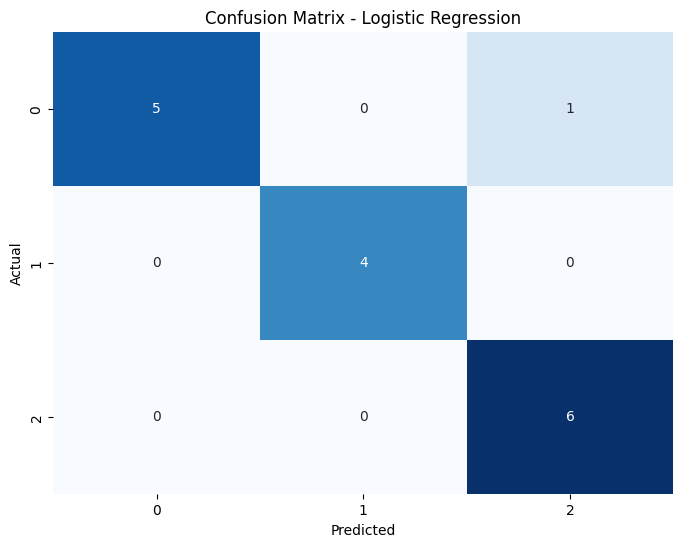

In [612]:

# Logistic Regression
lr_model = LogisticRegression(random_state=41, max_iter=10000)
lr_model.fit(X_class_train, Y_class_train)
y_class_lr = lr_model.predict(X_class_test)
accuracy_lr = accuracy_score(Y_class_test, y_class_lr)
print("\n" + "="*40)
print("== Logistic Regression Accuracy: {:.2f} ==".format(accuracy_lr))
print("="*40 + "\n")
conf_matrix_lr = confusion_matrix(Y_class_test, y_class_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [613]:
# Print Classification Report for Multilayer Perceptron Classifier
print("Classification Report for Multilayer Perceptron Classifier:")
print(classification_report(Y_class_test, y_class_lr))


Classification Report for Multilayer Perceptron Classifier:
              precision    recall  f1-score   support

        High       1.00      0.83      0.91         6
         Low       1.00      1.00      1.00         4
      Medium       0.86      1.00      0.92         6

    accuracy                           0.94        16
   macro avg       0.95      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



<h1 align="center"><b><i>Support Vector Machine Classifier</i></b></h1>


Support Vector Classifier Accuracy: 0.5


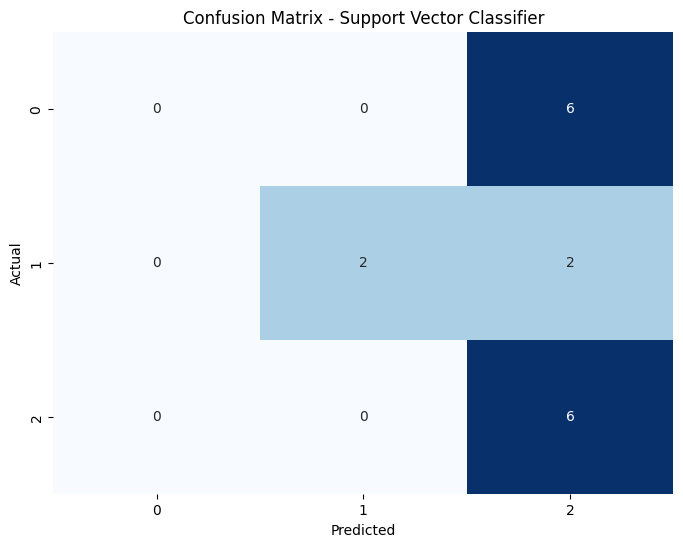

In [614]:
# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_class_train, Y_class_train)
y_class_svc = svc_model.predict(X_class_test)
accuracy_svc = accuracy_score(Y_class_test, y_class_svc)
print("Support Vector Classifier Accuracy:", accuracy_svc)
conf_matrix_svc = confusion_matrix(Y_class_test, y_class_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [615]:
# Print Classification Report for Multilayer Perceptron Classifier
print("Classification Report for Multilayer Perceptron Classifier:")
print(classification_report(Y_class_test, y_class_svc))


Classification Report for Multilayer Perceptron Classifier:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         6
         Low       1.00      0.50      0.67         4
      Medium       0.43      1.00      0.60         6

    accuracy                           0.50        16
   macro avg       0.48      0.50      0.42        16
weighted avg       0.41      0.50      0.39        16



C:\Users\moham\anaconda3\envs\python_bootcamp\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moham\anaconda3\envs\python_bootcamp\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moham\anaconda3\envs\python_bootcamp\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

<h1 align="center"><b><i>Decision Tree Classifier</i></b></h1>


Decision Tree Classifier Accuracy: 0.9375


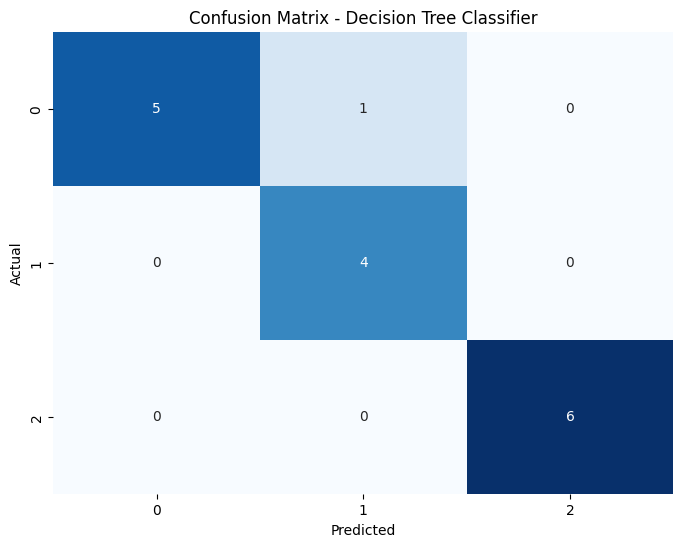

In [616]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_class_train, Y_class_train)
y_class_dt = dt_model.predict(X_class_test)
accuracy_dt = accuracy_score(Y_class_test, y_class_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)
conf_matrix_dt = confusion_matrix(Y_class_test, y_class_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [617]:
# Print Classification Report for Multilayer Perceptron Classifier
print("Classification Report for Multilayer Perceptron Classifier:")
print(classification_report(Y_class_test, y_class_dt))


Classification Report for Multilayer Perceptron Classifier:
              precision    recall  f1-score   support

        High       1.00      0.83      0.91         6
         Low       0.80      1.00      0.89         4
      Medium       1.00      1.00      1.00         6

    accuracy                           0.94        16
   macro avg       0.93      0.94      0.93        16
weighted avg       0.95      0.94      0.94        16



<h1 align="center"><b><i>Random Forest Classifier</i></b></h1>


Random Forest Classifier Accuracy: 1.0


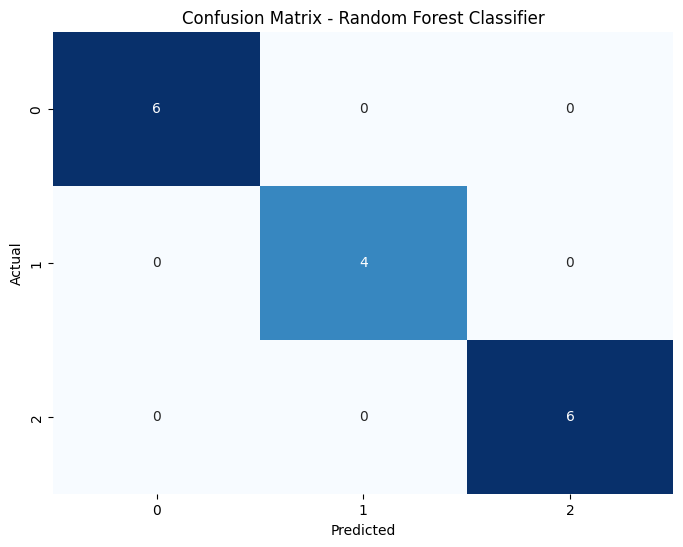

In [618]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_class_train, Y_class_train)
y_class_rf = rf_model.predict(X_class_test)
accuracy_rf = accuracy_score(Y_class_test, y_class_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)
conf_matrix_rf = confusion_matrix(Y_class_test, y_class_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [619]:
# Print Classification Report for Multilayer Perceptron Classifier
print("Classification Report for Multilayer Perceptron Classifier:")
print(classification_report(Y_class_test, y_class_rf))


Classification Report for Multilayer Perceptron Classifier:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         6
         Low       1.00      1.00      1.00         4
      Medium       1.00      1.00      1.00         6

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



<h1 align="center"><b><i>Gradient Boosting Classifier</i></b></h1>


Gradient Boosting Classifier Accuracy: 1.0


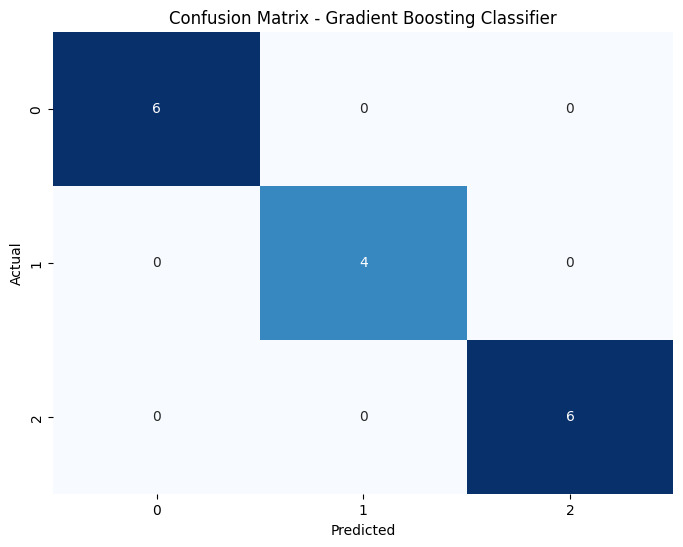

In [620]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_class_train, Y_class_train)
y_pred_gb = gb_model.predict(X_class_test)
accuracy_gb = accuracy_score(Y_class_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)
conf_matrix_gb = confusion_matrix(Y_class_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [621]:
# Print Classification Report for Multilayer Perceptron Classifier
print("Classification Report for Multilayer Perceptron Classifier:")
print(classification_report(Y_class_test, y_pred_gb))


Classification Report for Multilayer Perceptron Classifier:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         6
         Low       1.00      1.00      1.00         4
      Medium       1.00      1.00      1.00         6

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



<h1 align="center"><b><i>Gaussian Naive Bayes Classifier</i></b></h1>


Gaussian Naive Bayes Classifier Accuracy: 1.0


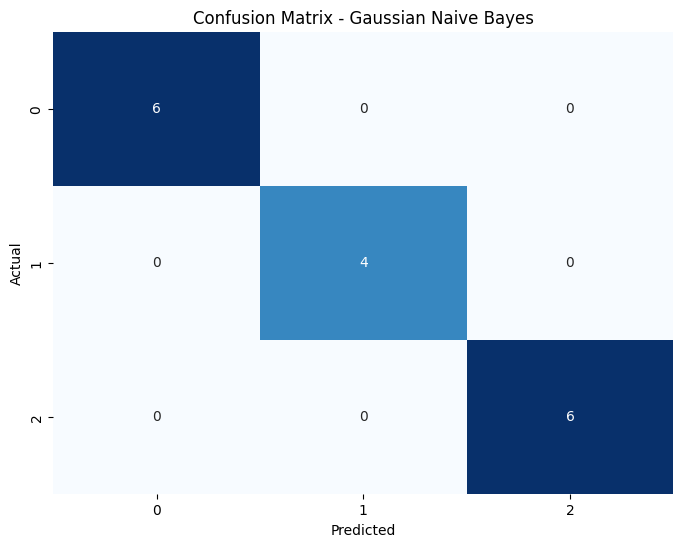

In [622]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Gaussian Naive Bayes Classifier
gnb_model = GaussianNB()
gnb_model.fit(X_class_train, Y_class_train)
y_pred_gnb = gnb_model.predict(X_class_test)
accuracy_gnb = accuracy_score(Y_class_test, y_pred_gnb)
print("Gaussian Naive Bayes Classifier Accuracy:", accuracy_gnb)

# Confusion Matrix for Gaussian Naive Bayes Classifier
cm_gnb = confusion_matrix(Y_class_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [623]:
from sklearn.metrics import classification_report

# Print Classification Report for Gaussian Naive Bayes Classifier
print("Classification Report for Gaussian Naive Bayes Classifier:")
print(classification_report(Y_class_test, y_pred_gnb))


Classification Report for Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         6
         Low       1.00      1.00      1.00         4
      Medium       1.00      1.00      1.00         6

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



<h1 align="center"><b><i>Multilayer Perceptron Classifier</i></b></h1>


Multilayer Perceptron Classifier Accuracy: 0.9375


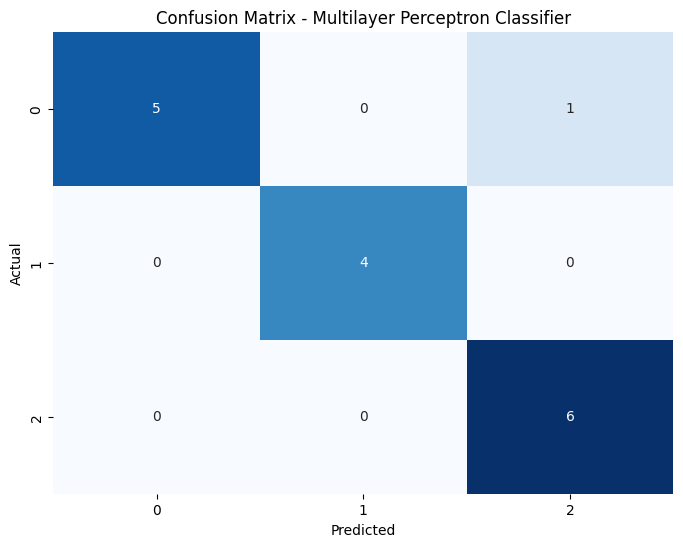

In [624]:
from sklearn.neural_network import MLPClassifier

# Multilayer Perceptron Classifier (Neural Network)
mlp_model =MLPClassifier(hidden_layer_sizes=(50,10),max_iter=2000,random_state=42)
mlp_model.fit(X_class_train, Y_class_train)
y_pred_mlp = mlp_model.predict(X_class_test)
accuracy_mlp = accuracy_score(Y_class_test, y_pred_mlp)
print("Multilayer Perceptron Classifier Accuracy:", accuracy_mlp)

# Confusion Matrix for Multilayer Perceptron Classifier
cm_mlp = confusion_matrix(Y_class_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Multilayer Perceptron Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [625]:
# Print Classification Report for Multilayer Perceptron Classifier
print("Classification Report for Multilayer Perceptron Classifier:")
print(classification_report(Y_class_test, y_pred_mlp))


Classification Report for Multilayer Perceptron Classifier:
              precision    recall  f1-score   support

        High       1.00      0.83      0.91         6
         Low       1.00      1.00      1.00         4
      Medium       0.86      1.00      0.92         6

    accuracy                           0.94        16
   macro avg       0.95      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16

